## Characterising gene loss and gene traffic in <i>Gasterosteus</i> sex chromosomes

In [3]:
from IPython.display import Image

The gene content of sex chromosomes is known to evolve in several major ways (see the schematic below):

1. Gene loss (through deletions, or degredation of gene sequences to a point where they can no longer be detected/annotated). 
2. Gene gain (through translocation/duplication of genes from the X or autosomes to the Y, or through duplication of genes already on the Y).

The aim of the analyses herein is to characterise the proportion of genes on the Y that are fall into these categories. 


In [12]:
## set location of git repo

wd = "/home/djeffrie/Data/Stickleback/Stickle_Y_comp/"

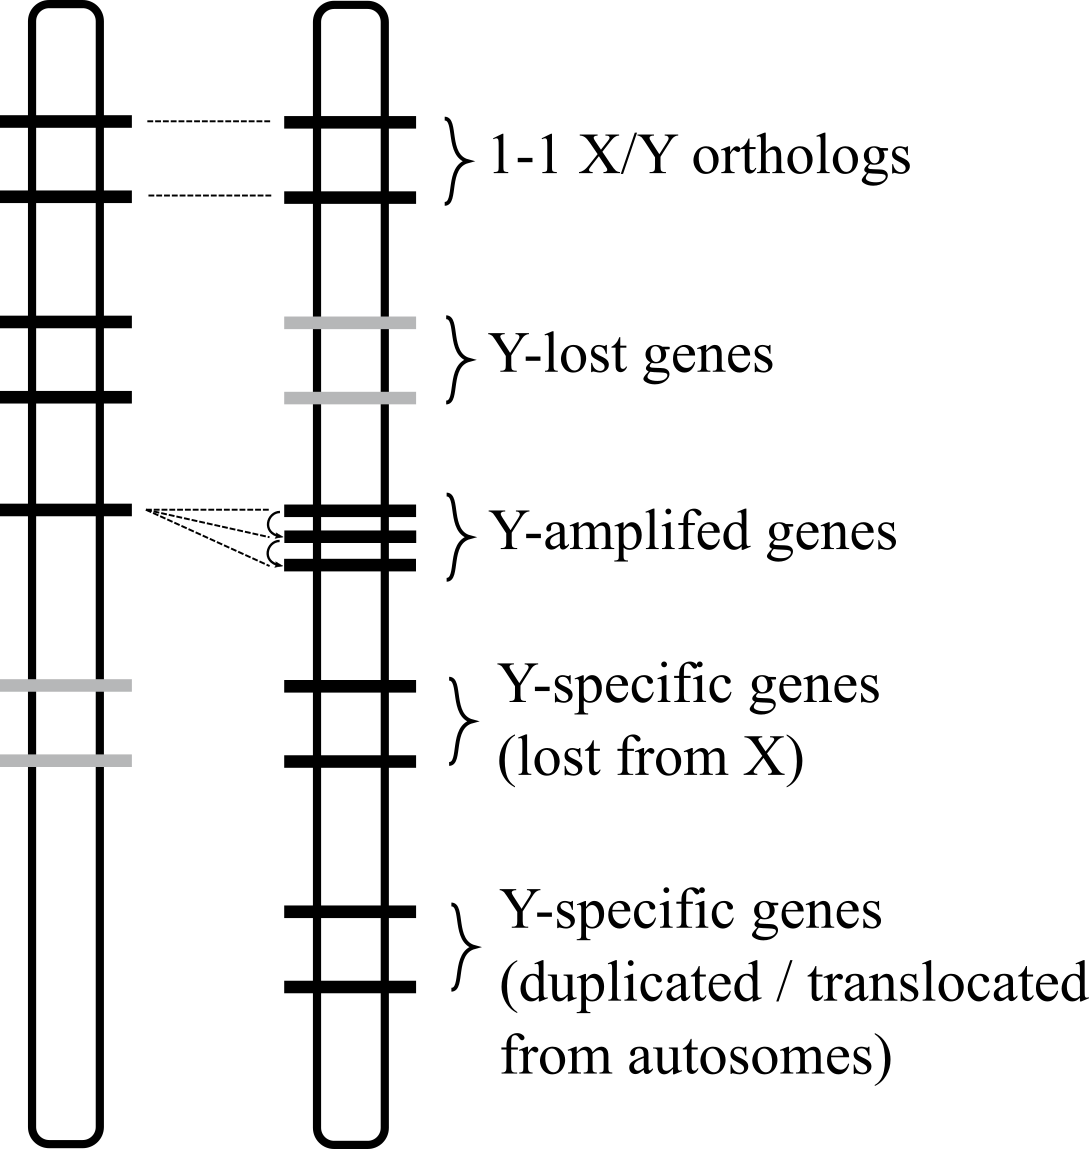

In [13]:
Image("%s/plots/misc/XY_orthology_schematic.png" % wd)

The work below will parse and analyse the outputs of gene orthology analyses carried out accross four species using Orthofinder (see phylogeny below). 

The goal is to characterise the evolution of gene content, via the two mechanisms above, on the Y chromosomes of <i>G. aculeatus</i> and <i>G. wheatlandi</i>.


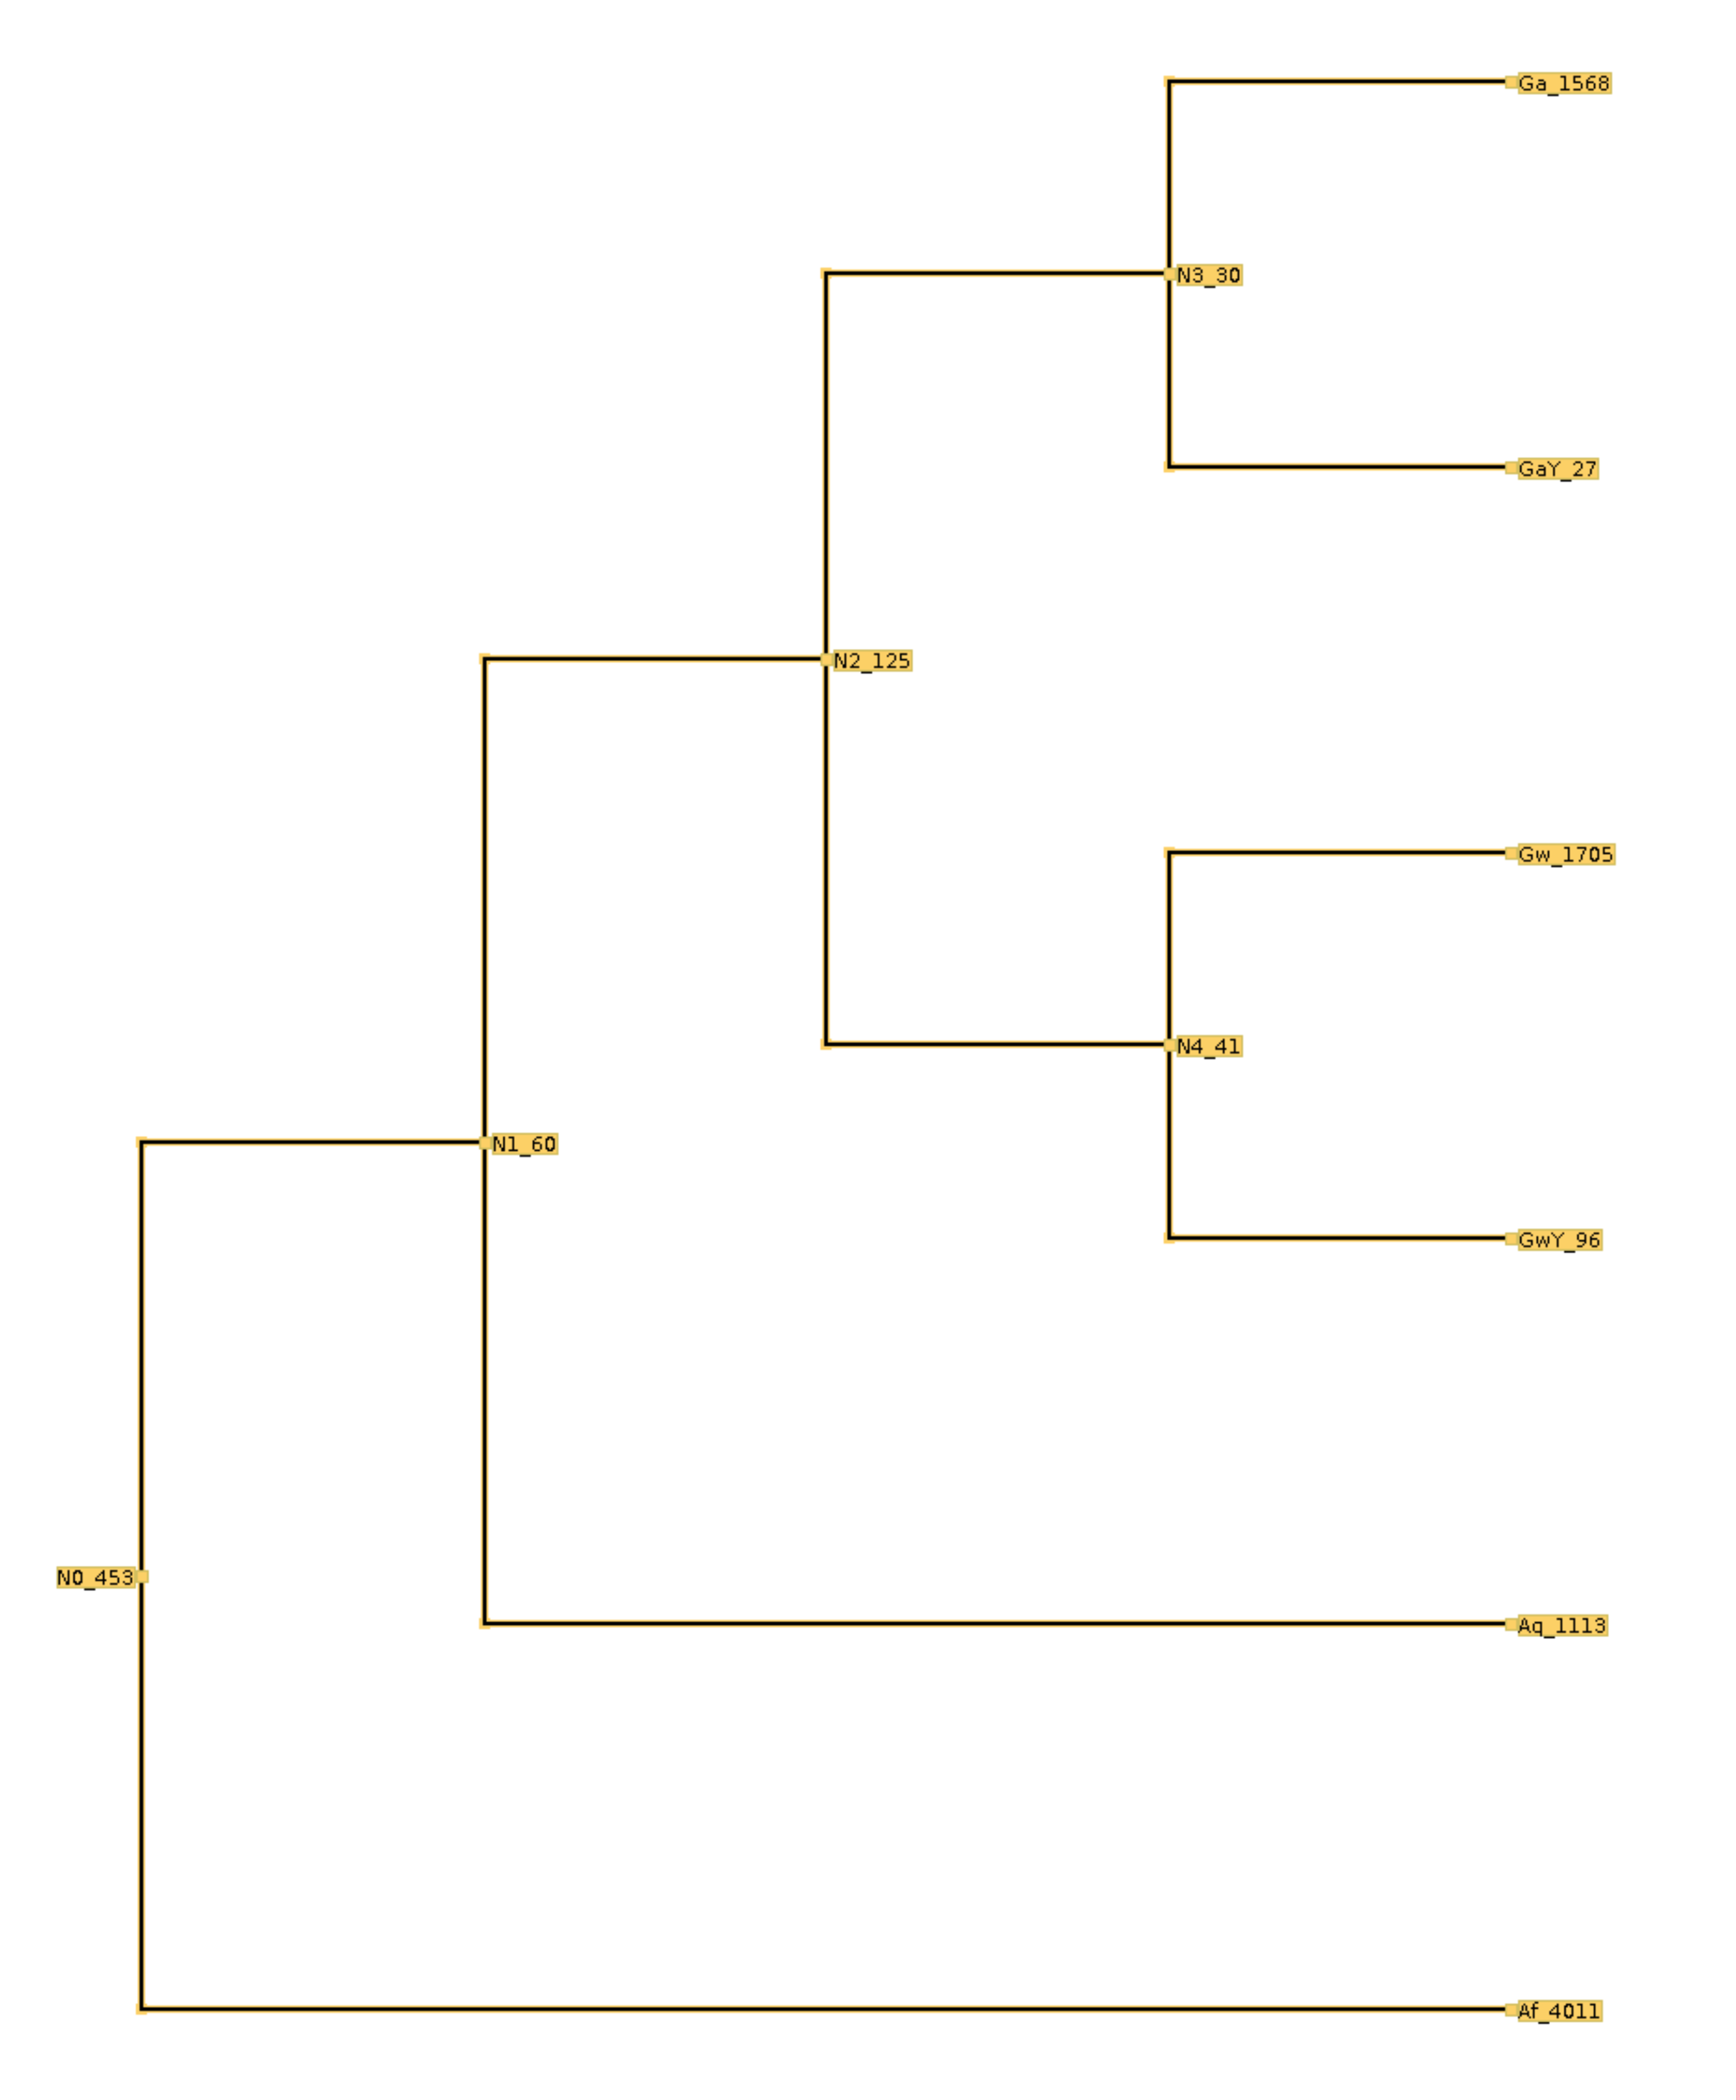

In [14]:
Image("%s/plots/misc/SpeciesTree_Gene_Duplications_0.5_Support.png" % wd)

# 0. Defining general functions 

The below functions get information from the Orthofinder outputs and annotation files which will be analysed later. 

In [15]:
def Get_chrom_gene_info(gff_path, chroms, feature, key):
    
    """
    Get gene IDs from a GFF for a chromosome of interest
    
    - gff_path:    The path to the gff file
    - chroms:      List of chromosomes for which to extract genes
    - feature:     The type of feature to extract (CDS, mRNA, exon, gene, etc.)
    - key:         The key for the ID of the gene (e.g. ID, Parent, etc.) 
    
    """
    
    Gene_dict = {}
    
    with open(gff_path) as gff:
        
        for line in gff:
            chrom = line.split()[0]
            
            if chrom in chroms:   

                if line.split()[2] == feature:
                    ID_field = line.split()[8]
                    start = line.split()[3]
                    stop = line.split()[4]
                    
                    for info in ID_field.split(";"):
                        if info.split("=")[0] == key:
                            gene = info.split("=")[1]
            
                    #print(chrom, feature, gene)
                    Gene_dict[gene] = {}
                    Gene_dict[gene]["CHROM"] = chrom
                    Gene_dict[gene]["START"] = start
                    Gene_dict[gene]["STOP"] = stop
                
    return Gene_dict
    

In [16]:
def Orthofiner_parser(N0_path):
    
    """
    This function parses the "N0.tsv" file in the "Phylogenetic_Hierarchical_Orthogroups" results directory
    
    This file contains all orthogroups identified in the analysis and lists the names of the orthologous/paralogous 
    genes in each species. So I can use it to make a dictionary of orthogroups, which I can then use to find groups that 
    I am interested in. 
    
    Note - it assumes 6 taxa were used. 
    
    """
    
    DB_dict = {}
    
    with open(N0_path) as N0:
        
        header = next(N0).strip()
        Tax1 = header.split("\t")[3]  # Af
        Tax2 = header.split("\t")[4]  # Aq
        Tax3 = header.split("\t")[5]  # Ga
        Tax4 = header.split("\t")[6]  # GaY
        Tax5 = header.split("\t")[7]  # Ga
        Tax6 = header.split("\t")[8]  # GaY
        
        for line in N0:
            line = line.strip("\n")
            HOG = line.split()[0]
            DB_dict[HOG] = {}
            
            DB_dict[HOG][Tax1] = [i.strip() for i in line.split("\t")[3].split(",")]
            DB_dict[HOG][Tax2] = [i.strip() for i in line.split("\t")[4].split(",")]
            DB_dict[HOG][Tax3] = [i.strip() for i in line.split("\t")[5].split(",")]
            DB_dict[HOG][Tax4] = [i.strip() for i in line.split("\t")[6].split(",")]
            DB_dict[HOG][Tax5] = [i.strip() for i in line.split("\t")[7].split(",")]
            DB_dict[HOG][Tax6] = [i.strip() for i in line.split("\t")[8].split(",")]
            
    return DB_dict
    
    
    

# <i>G. aculeatus</i>

Get autosomal, X, and Y gene info

In [17]:
## FILE PATHS

## Gff annotation files
Gff_PC_path_Ga = "%s/data/Orthology/gff3/Ga.longest.gff3" % wd

Gff_PC_path_GaY = "%s/data/Orthology/gff3/GaY.longest.gff3" % wd

## Orthofinder outputs
N0_path_PC = "%s/data/Orthology/N0.tsv" % wd


In [49]:
# Get autosome gene information
Ga_autosomes = ["NC_053212.1", #chromosome_1
                "NC_053213.1", #chromosome_2
                "NC_053214.1", #chromosome_3
                "NC_053215.1", #chromosome_4
                "NC_053216.1", #chromosome_5
                "NC_053217.1", #chromosome_6
                "NC_053218.1", #chromosome_7
                "NC_053219.1", #chromosome_8
                "NC_053220.1", #chromosome_9
                "NC_053221.1", #chromosome_10
                "NC_053222.1", #chromosome_11
                "NC_053223.1", #chromosome_12
                "NC_053224.1", #chromosome_13
                "NC_053225.1", #chromosome_14
                "NC_053226.1", #chromosome_15
                "NC_053227.1", #chromosome_16
                "NC_053228.1", #chromosome_17
                "NC_053229.1", #chromosome_18
                "NC_053231.1", #chromosome_20
                "NC_053232.1"] #chromosome_21

Ga_auto_genes = Get_chrom_gene_info(Gff_PC_path_Ga,
                  Ga_autosomes,
                  "mRNA",
                  "ID")

In [39]:
## get unplaced scaff genes

Ga_unplaced_names = []
with open("%s/data/Orthology/gff3/Ga_unplaced.names" % wd) as Ga_unplaced:
    for line in Ga_unplaced:
        Ga_unplaced_names.append(line.strip())

        
Ga_unplaced_genes = Get_chrom_gene_info(Gff_PC_path_Ga, 
                                        Ga_unplaced_names, # unplaced_scaffs 
                                        "mRNA",
                                        "ID")

In [72]:
# Get X gene information
Ga_X = "NC_053230.1"
Ga_X_genes = Get_chrom_gene_info(Gff_PC_path_Ga,
                                 [Ga_X], # Chr19 
                                 "mRNA",
                                 "ID")

In [73]:
# Get Y gene information
Ga_Y = "NC_053233.1"
Ga_Y_genes = Get_chrom_gene_info(Gff_PC_path_GaY,
                                 [Ga_Y], # Y chrom
                                 "mRNA",
                                 "ID")

In [30]:
## Parse Orthofinder results
N0_DB = Orthofiner_parser(N0_path_PC)

# General gene content statistics

In [43]:
print("There are a total of %s annotated genes on the Ga autosomes" % len(Ga_auto_genes))

There are a total of 20241 annotated genes on the Ga autosomes


In [31]:
print("There are a total of %s annotated genes on the Ga Y chromosome" % len(Ga_Y_genes))

There are a total of 484 annotated genes on the Ga Y chromosome


In [32]:
print("There are a total of %s annotated genes on the Ga X chromosome " % len(Ga_X_genes))

There are a total of 1118 annotated genes on the Ga X chromosome 


In [42]:
print("There are a total of %s annotated genes on unplaced Ga scaffolds " % len(Ga_unplaced_genes))

There are a total of 742 annotated genes on unplaced Ga scaffolds 


As a quick estimate, 1118 - 484 = 634 X-linked genes have no annotated copy with good homology on the Y. Many of these will be in the PAR, which is not included in the Y assembly but some genes maye have been lost from the Y, or degenerated to the point at which they are unrecognisable to either the annotation or orthology pipelines. 

However, there may be genes that have been gained by the X or the Y, which would mean that the above numbers are not completely accurate. Thus we need to quantify the number of 1-1 orthologs, X- or Y- duplicated genes, and those gained from autosomes. 

# 1-to-1 X/Y orthologs

***Genes retained on both X and Y***

The criterion to identify these genes are:

1. Present on the X and Y of Ga as single copy orthologs

I have not checked whether these genes have orthology to X or Y linked genes in Ga, as it is difficult to see how a gene would move to the sex chromosome after it was sex linked, and be on both gametologs. However it might reduce the number of genes we find just because they were not annotated properly in one or more of the outgroups. But we could check to see how this criterion affects results later, if the need arises.


In [60]:
GaXGaY_one2ones = []
GaAutoGaY_one2ones = []
GaUnplacedGaY_one2ones = []

for HOG in N0_DB:
    
    if all(["" not in N0_DB[HOG]["Ga"], "" not in N0_DB[HOG]["GaY"]]):
        
        if all([len(N0_DB[HOG]["Ga"]) == 1,len(N0_DB[HOG]["GaY"]) == 1]):
                        
            if N0_DB[HOG]["Ga"][0] in Ga_X_genes:
                GaXGaY_one2ones.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"][0]))
                
            elif N0_DB[HOG]["Ga"][0] in Ga_auto_genes:
                GaAutoGaY_one2ones.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"][0]))
                
            elif N0_DB[HOG]["Ga"][0] in Ga_unplaced_genes:
                GaUnplacedGaY_one2ones.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"][0]))
            
print("Found %s 1-to-1 orthologs between Ga X and GaY" % len(GaXGaY_one2ones))
print("Found %s 1-to-1 orthologs between Ga autosomes and GaY" % len(GaAutoGaY_one2ones))
print("Found %s 1-to-1 orthologs between Ga unplaced scaffs and GaY" % len(GaUnplacedGaY_one2ones))

Found 301 1-to-1 orthologs between Ga X and GaY
Found 9 1-to-1 orthologs between Ga autosomes and GaY
Found 2 1-to-1 orthologs between Ga unplaced scaffs and GaY


# Gene duplications on the X and Y

There are likely some genes with multiple copies on one or both sex chromosomes. There are several scenarios that could cause this. 

**For example:**

***If the X has one copy of a gene, but the Y has more than one:***
- that gene may have duplicated on the Y . . . 
- or there might have been an ancestral paralogous group, and one X copy has since been lost. 
- the same scenarios would fit if the X had multiple copies and the Y only one.

***If both sex chromosomes have the same number of copies of a particular gene (>1 copy)***
- Again this could be an ancestrally paralogous group, 
- Or duplications on both the X and Y of an ancestrally single copy gene. 

**To distinguish between these scenarios, we need to get at the information in the gene trees** (not done here, yet)

For now, lets see how many genes are in multiple-copies on one or both sex chromosomes.

In [142]:
singleGaX_multiGaY = []
singleGaAuto_multiGaY = []
singleGaUnplaced_multiGaY = []

multiGa_singleGaY = []
multiGaX_singleGaY = []
multiGaAuto_singleGaY = []
multiGaUnplaced_singleGaY = []

multiGa_multiGaY = []
multiGaX_multiGaY = []
multiGaAuto_multiGaY = []
multiGaUnplaced_multiGaY = []

for HOG in N0_DB:
           
    if all(["" not in N0_DB[HOG]["Ga"], "" not in N0_DB[HOG]["GaY"]]):  ## if nether the Ga or Ga_Y slots have missing data (i.e. orthologs were found in both)
        
        if all([len(N0_DB[HOG]["Ga"]) == 1,len(N0_DB[HOG]["GaY"]) > 1]):  ## If there is 1 gene on either an autosome or the X or unplaced scaff, and more than one on the Y
            
            if N0_DB[HOG]["Ga"][0] in Ga_X_genes:  ## If the non-Y gene is on the X
                singleGaX_multiGaY.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"]))
                
            elif N0_DB[HOG]["Ga"][0] in Ga_auto_genes: ## or if the non-Y gene is on an autosome
                singleGaAuto_multiGaY.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"]))
                
            elif N0_DB[HOG]["Ga"][0] in Ga_unplaced_genes: ## or if the non-Y gene is unplaced
                singleGaUnplaced_multiGaY.append((N0_DB[HOG]["Ga"][0], N0_DB[HOG]["GaY"]))
                
        ## if there are multiple X or autosomal genes, track where they are in the genome
        elif all([len(N0_DB[HOG]["Ga"]) > 1,len(N0_DB[HOG]["GaY"]) == 1]):
            
            Ga_locations = []
           
            for gene in N0_DB[HOG]["Ga"]: ## loop through the multiple non-Y genes, find their locations
                
                if gene in Ga_X_genes:
                    Ga_locations.append(Ga_X_genes[gene]["CHROM"])
                    
                elif gene in Ga_auto_genes:
                    Ga_locations.append(Ga_auto_genes[gene]["CHROM"])
                    
                elif gene in Ga_unplaced_genes:
                    Ga_locations.append(Ga_unplaced_genes[gene]["CHROM"])
                    
                else:
                    print(gene, "not in dict")
                                       
                       
            X_copies = 0
            Auto_copies = 0
            Unplaced_copies = 0
            
            for chrom in Ga_locations:
                if chrom == "NC_053230.1":
                    X_copies += 1
                elif chrom in Ga_autosomes:
                    Auto_copies += 1
                elif chrom in Ga_unplaced_names:
                    Unplaced_copies += 1
            
            if all([Auto_copies == 0, Unplaced_copies == 0, X_copies > 1]):  ## if the multiple non-Y genes all come from the X
                multiGaX_singleGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"][0]))
                
            elif all([Auto_copies > 1 , Unplaced_copies == 0, X_copies == 0]): ## if the multiple non-Y genes all come from the autosomes
                multiGaAuto_singleGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"][0]))
                
            elif all([Auto_copies == 0 , Unplaced_copies > 1, X_copies == 0]): ## if the multiple non-Y genes all come from unplaced scaffolds
                multiGaUnplaced_singleGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"][0]))
                
            elif any([X_copies >= 1, Auto_copies >= 1, Unplaced_copies >= 1]):  ## if the multiple non-Y are found on ANY/ALL of the X autosomes and unplaced scaffolds
                multiGa_singleGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"][0]))
                

                
        ### Finally, if there are multiple X/autosomal genes, AND multiple Y genes
        
        elif all([len(N0_DB[HOG]["Ga"]) > 1,len(N0_DB[HOG]["GaY"]) > 1]):
            
            Ga_locations = []
           
            for gene in N0_DB[HOG]["Ga"]: ## loop through the multiple non-Y genes, find their locations
                
                if gene in Ga_X_genes:
                    Ga_locations.append(Ga_X_genes[gene]["CHROM"])
                    
                elif gene in Ga_auto_genes:
                    Ga_locations.append(Ga_auto_genes[gene]["CHROM"])
                    
                elif gene in Ga_unplaced_genes:
                    Ga_locations.append(Ga_unplaced_genes[gene]["CHROM"])
                    
                else:
                    print(gene, "not in dict")
                                       
            
            X_copies = 0
            Auto_copies = 0
            Unplaced_copies = 0
            
            for chrom in Ga_locations:
                if chrom == "NC_053230.1":
                    X_copies += 1
                elif chrom in Ga_autosomes:
                    Auto_copies += 1
                elif chrom in Ga_unplaced_names:
                    Unplaced_copies += 1
                
            if all([Auto_copies == 0, Unplaced_copies == 0, X_copies > 1]):  ## if the multiple non-Y genes all come from the X
                multiGaX_multiGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"]))
                
            elif all([Auto_copies > 1 , Unplaced_copies == 0, X_copies == 0]):  ## if the multiple non-Y genes all come from the X
                multiGaAuto_multiGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"]))
            
            elif all([Auto_copies == 0 , Unplaced_copies > 1, X_copies == 0]): ## if the multiple non-Y genes all come from unplaced scaffolds
                multiGaUnplaced_multiGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"]))
            
            elif any([X_copies >= 1, Auto_copies >= 1, Unplaced_copies >= 1]):  ## if the multiple non-Y are found on ANY/ALL of the X autosomes and unplaced scaffolds
                multiGa_multiGaY.append((N0_DB[HOG]["Ga"], N0_DB[HOG]["GaY"]))
                
            
                
                
print("Found %s orthogroups with one X copy and multiple Y copies" % len(singleGaX_multiGaY))
print("Found %s orthogroups with one autosomal copy and multiple Y copies" % len(singleGaAuto_multiGaY))
print("Found %s orthogroups with one unplaced copy and multiple Y copies" % len(singleGaUnplaced_multiGaY))

print("\nFound %s orthogroups with multiple X copies and only 1 Y copy" % len(multiGaX_singleGaY))
print("Found %s orthogroups with multiple Autosomal copies and only 1 Y copy" % len(multiGaAuto_singleGaY))
print("Found %s orthogroups with multiple unplaced copies and only 1 Y copy" % len(multiGaUnplaced_singleGaY))

print("Found %s orthogroups with multiple copies spread across the X and EITHER/BOTH autosomal and unplaced scaffolds, and only 1 Y copy" % len(multiGa_singleGaY))

print("\nFound %s orthogroups with multiple X copies and multiple Y copies" % len(multiGaX_multiGaY))
print("Found %s orthogroups with multiple Autosomal copies and multiple Y copies" % len(multiGaAuto_multiGaY))
print("Found %s orthogroups with multiple unplaced copies and multiple Y copies" % len(multiGaUnplaced_multiGaY))

print("Found %s orthogroups with multiple copies spread across ANY/ALL of the X and EITHER/BOTH autosomal and unplaced scaffolds, and multiple Y copies" % len(multiGa_multiGaY))
    

Found 12 orthogroups with one X copy and multiple Y copies
Found 4 orthogroups with one autosomal copy and multiple Y copies
Found 0 orthogroups with one unplaced copy and multiple Y copies

Found 8 orthogroups with multiple X copies and only 1 Y copy
Found 4 orthogroups with multiple Autosomal copies and only 1 Y copy
Found 0 orthogroups with multiple unplaced copies and only 1 Y copy
Found 14 orthogroups with multiple copies spread across the X and EITHER/BOTH autosomal and unplaced scaffolds, and only 1 Y copy

Found 2 orthogroups with multiple X copies and multiple Y copies
Found 3 orthogroups with multiple Autosomal copies and multiple Y copies
Found 0 orthogroups with multiple unplaced copies and multiple Y copies
Found 10 orthogroups with multiple copies spread across ANY/ALL of the X and EITHER/BOTH autosomal and unplaced scaffolds, and multiple Y copies


### How many genes are included in these orthogroups?

# INCLUDE UNPLACED LISTS FOR THE BELOW CELLS

In [143]:
GaXGaY_one2ones_X_genes = []
GaXGaY_one2ones_Y_genes = []

GaXGaY_one2ones_X_genes += [i[0] for i in GaXGaY_one2ones]
GaXGaY_one2ones_Y_genes += [i[1] for i in GaXGaY_one2ones]

print("There are %s X genes in the %s orthogroups with 1-1 orthologs between X and Y" % (len(GaXGaY_one2ones_X_genes), len(GaXGaY_one2ones)))
print("There are %s Y genes in the %s orthogroups with 1-1 orthologs between X and Y" % (len(GaXGaY_one2ones_Y_genes), len(GaXGaY_one2ones)))

There are 301 X genes in the 301 orthogroups with 1-1 orthologs between X and Y
There are 301 Y genes in the 301 orthogroups with 1-1 orthologs between X and Y


In [144]:
GaAutoGaY_one2ones_Auto_genes = []
GaAutoGaY_one2ones_Y_genes = []

GaAutoGaY_one2ones_Auto_genes += [i[0] for i in GaAutoGaY_one2ones]
GaAutoGaY_one2ones_Y_genes += [i[1] for i in GaAutoGaY_one2ones]

print("There are %s autosomal genes in the %s orthogroups with 1-1 orthologs between an autosome and Y" % (len(GaAutoGaY_one2ones_Auto_genes), len(GaAutoGaY_one2ones)))
print("There are %s Y genes in the %s orthogroups with 1-1 orthologs between an autosome and Y" % (len(GaAutoGaY_one2ones_Y_genes), len(GaAutoGaY_one2ones)))

There are 9 autosomal genes in the 9 orthogroups with 1-1 orthologs between an autosome and Y
There are 9 Y genes in the 9 orthogroups with 1-1 orthologs between an autosome and Y


In [145]:
GaUnplacedGaY_one2ones_Unplaced_genes = []
GaUnplacedGaY_one2ones_Y_genes = []

GaUnplacedGaY_one2ones_Unplaced_genes += [i[0] for i in GaUnplacedGaY_one2ones]
GaUnplacedGaY_one2ones_Y_genes += [i[1] for i in GaUnplacedGaY_one2ones]

print("There are %s autosomal genes in the %s orthogroups with 1-1 orthologs between an autosome and Y" % (len(GaUnplacedGaY_one2ones_Unplaced_genes), len(GaUnplacedGaY_one2ones)))
print("There are %s Y genes in the %s orthogroups with 1-1 orthologs between an autosome and Y" % (len(GaUnplacedGaY_one2ones_Y_genes), len(GaUnplacedGaY_one2ones)))

There are 2 autosomal genes in the 2 orthogroups with 1-1 orthologs between an autosome and Y
There are 2 Y genes in the 2 orthogroups with 1-1 orthologs between an autosome and Y


In [146]:
singleGaX_multiGaY_X_genes = []
singleGaX_multiGaY_Y_genes = []

## Unflattened the nested lists
singleGaX_multiGaY_X_genes += [i[0] for i in singleGaX_multiGaY]
singleGaX_multiGaY_Y_genes += [j for i in singleGaX_multiGaY for j in i[1]]

print("There are %s X genes in the %s orthogroups showing signs of Y expansion or X loss" % (len(singleGaX_multiGaY_X_genes), len(singleGaX_multiGaY)))
print("There are %s Y genes in the %s orthogroups showing signs of Y expansion or X loss" % (len(singleGaX_multiGaY_Y_genes), len(singleGaX_multiGaY)))
print("   Assuming no genes have been lost, %s - %s = %s Y genes are the result of duplication on the Y" % (len(singleGaX_multiGaY_Y_genes), len(singleGaX_multiGaY), (len(singleGaX_multiGaY_Y_genes)- len(singleGaX_multiGaY))))


There are 12 X genes in the 12 orthogroups showing signs of Y expansion or X loss
There are 25 Y genes in the 12 orthogroups showing signs of Y expansion or X loss
   Assuming no genes have been lost, 25 - 12 = 13 Y genes are the result of duplication on the Y


In [179]:
singleGaAuto_multiGaY_Auto_genes = []
singleGaAuto_multiGaY_Y_genes = []

## Unflattened the nested lists
singleGaAuto_multiGaY_Auto_genes += [i[0] for i in singleGaAuto_multiGaY]
singleGaAuto_multiGaY_Y_genes += [j for i in singleGaAuto_multiGaY for j in i[1]]

print("There are %s autosomal genes in the %s orthogroups showing signs of Y expansion or autosomal loss" % (len(singleGaAuto_multiGaY_Auto_genes), len(singleGaAuto_multiGaY)))
print("There are %s Y genes in the %s orthogroups showing signs of Y expansion or autosomal loss" % (len(singleGaAuto_multiGaY_Y_genes), len(singleGaAuto_multiGaY)))
print("   Assuming no genes have been lost, %s - %s = %s Y genes could be the result of duplication on the Y" % (len(singleGaAuto_multiGaY_Y_genes), len(singleGaAuto_multiGaY), (len(singleGaAuto_multiGaY_Y_genes)- len(singleGaAuto_multiGaY))))

There are 4 autosomal genes in the 4 orthogroups showing signs of Y expansion or autosomal loss
There are 13 Y genes in the 4 orthogroups showing signs of Y expansion or autosomal loss
   Assuming no genes have been lost, 13 - 4 = 9 Y genes could be the result of duplication on the Y


<b>Note, we do not know if these duplicate Y genes are the result of duplications of Y genes on the Y, multiple duplications of the same autosomal genes TO the Y, or losses of autosomal genes. We will need to examine gene trees to see this.</b>

In [148]:
singleGaUnplaced_multiGaY_Auto_genes = []
singleGaUnplaced_multiGaY_Y_genes = []

## Unflattened the nested lists
singleGaUnplaced_multiGaY_Auto_genes += [i[0] for i in singleGaUnplaced_multiGaY]
singleGaUnplaced_multiGaY_Y_genes += [j for i in singleGaUnplaced_multiGaY for j in i[1]]

print("There are %s unplaced genes in the %s orthogroups showing signs of Y expansion or unplaced scaff loss" % (len(singleGaUnplaced_multiGaY_Auto_genes), len(singleGaUnplaced_multiGaY)))
print("There are %s Y genes in the %s orthogroups showing signs of Y expansion or unplaced scaff loss" % (len(singleGaUnplaced_multiGaY_Y_genes), len(singleGaUnplaced_multiGaY)))
print("   Assuming no genes have been lost, %s - %s = %s Y genes could be the result of duplication on the Y" % (len(singleGaUnplaced_multiGaY_Y_genes), len(singleGaUnplaced_multiGaY), (len(singleGaUnplaced_multiGaY_Y_genes)- len(singleGaUnplaced_multiGaY))))

There are 0 unplaced genes in the 0 orthogroups showing signs of Y expansion or unplaced scaff loss
There are 0 Y genes in the 0 orthogroups showing signs of Y expansion or unplaced scaff loss
   Assuming no genes have been lost, 0 - 0 = 0 Y genes could be the result of duplication on the Y


Nothing to see here, but worth keeping it in for completeness

In [149]:
multiGaX_multiGaY_X_genes = []
multiGaX_multiGaY_Y_genes = []

## Unflatted the nested lists
multiGaX_multiGaY_X_genes += [j for i in multiGaX_multiGaY for j in i[0]]
multiGaX_multiGaY_Y_genes += [j for i in multiGaX_multiGaY for j in i[1]]

print("There are %s X genes in the %s orthogroups with multiple gene copies on both X and Y" % (len(multiGaX_multiGaY_X_genes), len(multiGaX_multiGaY)))
print("There are %s Y genes in the %s orthogroups with multiple gene copies on both X and Y" % (len(multiGaX_multiGaY_Y_genes), len(multiGaX_multiGaY)))


There are 4 X genes in the 2 orthogroups with multiple gene copies on both X and Y
There are 4 Y genes in the 2 orthogroups with multiple gene copies on both X and Y


<b>Note, we do not know whether these duplications happened before or after these genes became sex linked, gene trees will help here again. </b>

In [150]:
multiGaAuto_multiGaY_Auto_genes = []
multiGaAuto_multiGaY_Y_genes = []

## Unflatted the nested lists
multiGaAuto_multiGaY_Auto_genes += [j for i in multiGaAuto_multiGaY for j in i[0]]
multiGaAuto_multiGaY_Y_genes += [j for i in multiGaAuto_multiGaY for j in i[1]]

print("There are %s autosomal genes in the %s orthogroups with multiple gene copies on both autosomes and Y" % (len(multiGaAuto_multiGaY_Auto_genes), len(multiGaAuto_multiGaY)))
print("There are %s Y genes in the %s orthogroups with multiple gene copies on both autosomes and Y" % (len(multiGaAuto_multiGaY_Y_genes), len(multiGaAuto_multiGaY)))

There are 8 autosomal genes in the 3 orthogroups with multiple gene copies on both autosomes and Y
There are 9 Y genes in the 3 orthogroups with multiple gene copies on both autosomes and Y


<b>Note, we do not know whether these duplications happened before or after these genes became sex linked, gene trees will help here again. </b>

In [202]:
multiGaUnplaced_multiGaY_unplaced_genes = []
multiGaUnplaced_multiGaY_Y_genes = []

## Unflatted the nested lists
multiGaUnplaced_multiGaY_unplaced_genes += [j for i in multiGaUnplaced_multiGaY for j in i[0]]
multiGaUnplaced_multiGaY_Y_genes += [j for i in multiGaUnplaced_multiGaY for j in i[1]]

print("There are %s unplaced genes in the %s orthogroups with multiple gene copies on both unplaced scaffs and Y" % (len(multiGaUnplaced_multiGaY_unplaced_genes), len(multiGaUnplaced_multiGaY)))
print("There are %s Y genes in the %s orthogroups with multiple gene copies on both unplaced scaffs and Y" % (len(multiGaUnplaced_multiGaY_Y_genes), len(multiGaUnplaced_multiGaY)))

There are 0 unplaced genes in the 0 orthogroups with multiple gene copies on both unplaced scaffs and Y
There are 0 Y genes in the 0 orthogroups with multiple gene copies on both unplaced scaffs and Y


Nothing to see here, but good to have it in for completeness

In [221]:
multiGa_multiGaY_nonY_genes = []
multiGa_multiGaY_Y_genes = []

## Unflatted the nested lists
multiGa_multiGaY_nonY_genes += [j for i in multiGa_multiGaY for j in i[0]]
multiGa_multiGaY_Y_genes += [j for i in multiGa_multiGaY for j in i[1]]

## find X genes 

multiGa_multiGaY_X_genes = []

for gene in multiGa_multiGaY_nonY_genes:
    if gene in Ga_X_genes:
        multiGa_multiGaY_X_genes.append(gene)
    
print("There are %s non-Y genes in the %s orthogroups with multiple gene copies spread across ANY/ALL of the X, autosomes and unplaced scaffs, and Y" % (len(multiGa_multiGaY_nonY_genes), len(multiGa_multiGaY)))
print(" - Of which %s are on the X chromosome" % len(multiGa_multiGaY_X_genes))
print("There are %s Y genes in the %s orthogroups with multiple gene copies on ANY/ALL of the X, autosomes and unplaced scaffs, and Y" % (len(multiGa_multiGaY_Y_genes), len(multiGa_multiGaY)))

There are 90 non-Y genes in the 10 orthogroups with multiple gene copies spread across ANY/ALL of the X, autosomes and unplaced scaffs, and Y
 - Of which 53 are on the X chromosome
There are 41 Y genes in the 10 orthogroups with multiple gene copies on ANY/ALL of the X, autosomes and unplaced scaffs, and Y


In [155]:
multiGaX_singleGaY_X_genes = []
multiGaX_singleGaY_Y_genes = []

multiGaX_singleGaY_X_genes = [j for i in multiGaX_singleGaY for j in i[0]]
multiGaX_singleGaY_Y_genes += [i[1] for i in multiGaX_singleGaY]

print("There are %s X genes in the %s orthogroups with 1 Y gene and multiple X genes" % (len(multiGaX_singleGaY_X_genes), len(multiGaX_singleGaY)))
print("There are %s Y genes in the %s orthogroups with 1 Y gene and multiple X genes" % (len(multiGaX_singleGaY_Y_genes), len(multiGaX_singleGaY)))


There are 22 X genes in the 8 orthogroups with 1 Y gene and multiple X genes
There are 8 Y genes in the 8 orthogroups with 1 Y gene and multiple X genes


<b>Note, we do not know whether these genes represent expansion on the X since sex linkage occurred, or whether multiple copies existed prior to sex linkage and some copies have been lost on the Y.</b>

In [156]:
multiGaAuto_singleGaY_Auto_genes = []
multiGaAuto_singleGaY_Y_genes = []

multiGaAuto_singleGaY_Auto_genes += [j for i in multiGaAuto_singleGaY for j in i[0]]
multiGaAuto_singleGaY_Y_genes += [i[1] for i in multiGaAuto_singleGaY]

print("There are %s Auto genes in %s orthogroups with 1 Y gene and multiple Autosomal genes" % (len(multiGaAuto_singleGaY_Auto_genes), len(multiGaAuto_singleGaY)))
print("There are %s Y genes in %s orthogroups with 1 Y gene and multiple Autosomal genes" % (len(multiGaAuto_singleGaY_Y_genes), len(multiGaAuto_singleGaY)))


There are 11 Auto genes in 4 orthogroups with 1 Y gene and multiple Autosomal genes
There are 4 Y genes in 4 orthogroups with 1 Y gene and multiple Autosomal genes


In [157]:
multiGa_singleGaY_Auto_genes = []
multiGa_singleGaY_Unplaced_genes = []
multiGa_singleGaY_X_genes = []
multiGa_singleGaY_Y_genes = []

for gene in [j for i in multiGa_singleGaY for j in i[0]]:
    if gene in Ga_auto_genes:
        multiGa_singleGaY_Auto_genes.append(gene)
    elif gene in Ga_unplaced_genes:
        multiGa_singleGaY_Unplaced_genes.append(gene)
    elif gene in Ga_X_genes:
        multiGa_singleGaY_X_genes.append(gene)

multiGa_singleGaY_Y_genes += [i[1] for i in multiGa_singleGaY]

print("There are %s autosomal genes in the %s orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds" % (len(multiGa_singleGaY_Auto_genes), len(multiGa_singleGaY)))
print("There are %s unplaced genes in the %s orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds" % (len(multiGa_singleGaY_Unplaced_genes), len(multiGa_singleGaY)))
print("There are %s X genes in the %s orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds" % (len(multiGa_singleGaY_X_genes), len(multiGa_singleGaY)))
print("There are %s Y genes in the %s orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds" % (len(multiGa_singleGaY_Y_genes), len(multiGa_singleGaY)))


There are 13 autosomal genes in the 14 orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds
There are 2 unplaced genes in the 14 orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds
There are 14 X genes in the 14 orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds
There are 14 Y genes in the 14 orthogroups with 1 Y gene and multiple genes spread across both X and EITHER/BOTH autosomes or unplaced scaffolds


# Orphaned Y genes

How many genes on the Y do not have an identified ortholog in the Ga genome? (They must have an ortholog in another species)   
<b>Such genes could be cases where the X or autosomal homolog was not found, or where a translocation occurred to the Y. </b>

In [158]:
single_copy_Y_orhpans = []
multi_copy_Y_orhpans = []

for HOG in N0_DB:
     if all(["" in N0_DB[HOG]["Ga"], "" not in N0_DB[HOG]["GaY"]]):
            if len(N0_DB[HOG]["GaY"]) == 1:
                #print("single",N0_DB[HOG])
                single_copy_Y_orhpans.append(N0_DB[HOG]["GaY"][0])
            elif len(N0_DB[HOG]["GaY"]) > 1:
                #print("multi",N0_DB[HOG])
                multi_copy_Y_orhpans.append(N0_DB[HOG]["GaY"])
                
single_copy_Y_orhpan_genes = single_copy_Y_orhpans
multi_copy_Y_orhpan_genes = [j for i in multi_copy_Y_orhpans for j in i]
                
print("Found %s single copy Y genes with no annotated homolog on the Ga X or autosomes" % len(single_copy_Y_orhpans))
print("Found %s multi-copy Y gene groups (containing %s genes) with no annotated homolog on the Ga X or autosomes" % (len(multi_copy_Y_orhpans), len(multi_copy_Y_orhpan_genes)))

Found 12 single copy Y genes with no annotated homolog on the Ga X or autosomes
Found 8 multi-copy Y gene groups (containing 21 genes) with no annotated homolog on the Ga X or autosomes


*** Note - at some point we need to align the sequences of these orphaned genes to the genome to make sure they are actually missing, and not just unannotated. If the latter, then they could be translocated, not duplicated? Could test this by searching them against other species ***

# To do - look for orthology with other species - are these translocations? 


## Genes lost from the Ga Y

Now we have characterised genes retained and genes duplicated we can more accurately assess how many genes have been lost on the Y. 

Specifically here I will look for X-linked genes that have no Y orthologs, either single or mult-copy. 

I will also see how many of these are also in the Gw X19 annotation.

In [159]:
Gff_PC_path_Gw = "%s/data/Orthology/gff3/Gw.longest.gff3" % wd 

Gw_X19_genes = Get_chrom_gene_info(Gff_PC_path_Gw,
                  ["chr19"],
                  "mRNA",
                  "ID")

In [160]:
Ga_Y_lost = []
Ga_Y_lost_anc = []

for HOG in N0_DB:
           
    if all(["" not in N0_DB[HOG]["Ga"], "" in N0_DB[HOG]["GaY"]]): ## If genes is found in Ga and NOT GaY
        
        for gene in N0_DB[HOG]["Ga"]:
            if gene in Ga_X_genes:  
                Ga_Y_lost.append(gene)
                    
                if "" not in N0_DB[HOG]["Gw"]: ## if the gene is also in Gw
                    if N0_DB[HOG]["Gw"][0] in Gw_X19_genes:
                        Ga_Y_lost_anc.append(gene)
                    
                            
        

Output these to file for Zuyao

In [161]:
Ga_Ylost_out_path = "%s/data/Orthology/Ga_outputs/Ga_X_specific.txt" % wd 

with open(Ga_Ylost_out_path, 'w') as Ga_Ylost_out:

    Ga_Ylost_out.write("## Genes which are present on the Ga_X but absent from the Ga_Y\n")
    Ga_Ylost_out.write("## The 'GwX?' column denotes whether there is an ortholog on the GwX19 or not\n#\n")
    Ga_Ylost_out.write("X_gene\tCHROM\tX_START\tX_STOP\tGwX\n")
    
    for gene in Ga_Y_lost: 
        if gene in Ga_Y_lost_anc:
            Ga_Ylost_out.write("%s\t%s\t%s\t%s\t%s\n" % (gene, Ga_X_genes[gene]["CHROM"], Ga_X_genes[gene]["START"],Ga_X_genes[gene]["STOP"],"Present"))
        else:
            Ga_Ylost_out.write("%s\t%s\t%s\t%s\t%s\n" % (gene, Ga_X_genes[gene]["CHROM"], Ga_X_genes[gene]["START"],Ga_X_genes[gene]["STOP"],"Absent"))
            
    
    

In [162]:
print("Out of %s annotated genes on the Ga_X(s), %s could not be found, %s of which have an identified ortholog on the Gw X19 chromosome" % (len(Ga_X_genes), len(Ga_Y_lost), len(Ga_Y_lost_anc)))

Out of 1118 annotated genes on the Ga_X(s), 682 could not be found, 579 of which have an identified ortholog on the Gw X19 chromosome


### Ok how many Y genes are accounted for in the above analysis? 

In [ ]:
GaXGaY_one2ones_Y_genes
GaAutoGaY_one2ones_Y_genes
GaUnplacedGaY_one2ones_Y_genes
singleGaX_multiGaY_Y_genes
singleGaAuto_multiGaY_Y_genes
singleGaAuto_multiGaY_Y_genes
multiGaX_multiGaY_Y_genes
multiGaAuto_multiGaY_Y_genes
multiGaUnplaced_multiGaY_Y_genes
multiGa_multiGaY_Y_genes
multiGaX_singleGaY_Y_genes
multiGaAuto_singleGaY_Y_genes
multiGa_singleGaY_Y_genes
single_copy_Y_orhpan_genes
multi_copy_Y_orhpan_genes

In [209]:
all_GaY_gene_lists = [GaXGaY_one2ones_Y_genes,
                     GaAutoGaY_one2ones_Y_genes,
                     GaUnplacedGaY_one2ones_Y_genes,
                     singleGaX_multiGaY_Y_genes,
                     singleGaAuto_multiGaY_Y_genes,
                     singleGaUnplaced_multiGaY_Auto_genes,
                     multiGaX_multiGaY_Y_genes,
                     multiGaAuto_multiGaY_Y_genes,
                     multiGaUnplaced_multiGaY_Y_genes,
                     multiGa_multiGaY_Y_genes,
                     multiGaX_singleGaY_Y_genes,
                     multiGaAuto_singleGaY_Y_genes,
                     multiGa_singleGaY_Y_genes,
                     single_copy_Y_orhpan_genes,
                     multi_copy_Y_orhpan_genes] 
## flatten
all_GaY_genes_accounted_for = []
all_GaY_genes_accounted_for = [j for i in all_GaY_gene_lists for j in i]

print("Accounted for %s genes out of %s genes in the OrthoFinder N0.tsv output file" % (len(all_GaY_genes_accounted_for), len(Ga_Y_genes)))

Accounted for 463 genes out of 484 genes in the OrthoFinder N0.tsv output file


In [185]:
print("So we are %s genes short" % (len(Ga_Y_genes) - len(all_GaY_genes_accounted_for)))

So we are 21 genes short


<b>So what are these missing genes? Are they in the N0 file at all? </b>

In [186]:
## This cell is used to troubleshoot unaccounted for Y genes

missing_Y_genes = []
for HOG in N0_DB:
    for gene in N0_DB[HOG]["GaY"]:
        if all([gene != "", gene not in all_GaY_genes_accounted_for]):
            print(gene, HOG, "Ga:", N0_DB[HOG]["Ga"], "GaY:", N0_DB[HOG]["GaY"])
            missing_Y_genes.append(gene)
            
            for gene in N0_DB[HOG]["Ga"]:
                if gene in Ga_X_genes:
                    print(Ga_X_genes[gene])
                elif gene in Ga_auto_genes:
                    print(gene, "AUTO", Ga_auto_genes[gene])
                elif gene in Ga_unplaced_genes:
                    print(gene, "UNPLACED", Ga_unplaced_genes[gene])

<b>No they aren't. So they likely had no orthologs identified</b>

In [187]:
No_ortho_Y_genes = []
for gene in Ga_Y_genes:
    if gene not in all_GaY_genes_accounted_for:
        No_ortho_Y_genes.append(gene)

# Y-genes summary

In [234]:
print("%s genes were annotated on the Ga Y chromosome" % len(Ga_Y_genes))

print("\nOne to ones:")
print("Found %s 1-to-1 orthologs between Ga X and GaY (%s Y genes)" % (len(GaXGaY_one2ones), len(GaXGaY_one2ones_Y_genes)))
print("Found %s 1-to-1 orthologs between Ga autosomes and GaY (%s Y genes)" % (len(GaAutoGaY_one2ones), len(GaAutoGaY_one2ones_Y_genes)))
print("Found %s 1-to-1 orthologs between Ga unplaced scaffs and GaY (%s Y genes)" % (len(GaUnplacedGaY_one2ones), len(GaUnplacedGaY_one2ones_Y_genes)))

print("\nOne to many:")
print("Found %s orthogroups with one X copy and multiple Y copies (%s Y genes)" % (len(singleGaX_multiGaY), len(singleGaX_multiGaY_Y_genes)))
print("Found %s orthogroups with one X autosomal copy and multiple Y copies (%s Y genes)" % (len(singleGaAuto_multiGaY), len(singleGaAuto_multiGaY_Y_genes)))
print("Found %s orthogroups with one X unplaced copy and multiple Y copies (%s Y genes)" % (len(singleGaUnplaced_multiGaY), len(singleGaUnplaced_multiGaY_Y_genes)))

print("\nMany to one:")
print("Found %s orthogroups with multiple X copies and only 1 Y copy (%s Y genes)" % (len(multiGaX_singleGaY), len(multiGaX_singleGaY_Y_genes)))
print("Found %s orthogroups with multiple Autosomal copies and only 1 Y copy (%s Y genes)" % (len(multiGaAuto_singleGaY),len(multiGaAuto_singleGaY_Y_genes)))
print("Found %s orthogroups with multiple unpaced copies and only 1 Y copy (%s Y genes)" % (len(multiGaUnplaced_singleGaY),len(multiGaUnplaced_singleGaY_Y_genes)))
print("Found %s orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (%s Y genes)" % (len(multiGa_singleGaY),len(multiGa_singleGaY_Y_genes)))

print("\nMany to many:")
print("Found %s orthogroups with multiple X copies and multiple Y copies (%s Y genes)" % (len(multiGaX_multiGaY), len(multiGaX_multiGaY_Y_genes)))
print("Found %s orthogroups with multiple Autosomal copies and multiple Y copies (%s Y genes)" % (len(multiGaAuto_multiGaY), len(multiGaAuto_multiGaY_Y_genes)))
print("Found %s orthogroups with multiple unplaced copies and multiple Y copies (%s Y genes)" % (len(multiGaUnplaced_multiGaY), len(multiGaUnplaced_multiGaY_Y_genes)))
print("Found %s orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and multiple Y copy (%s Y genes)" % (len(multiGa_multiGaY),len(multiGa_multiGaY_Y_genes)))

print("\nY orphans:")
print("Found %s single copy Y genes with no annotated homolog on the Ga X or autosomes or unplaced scaffolds" % len(single_copy_Y_orhpan_genes))
print("Found %s multi-copy Y gene groups with no annotated homolog on the Ga X or autosomes or unplaced scaffolds" % len(multi_copy_Y_orhpan_genes))

print("\n%s Ga Y genes had no orthology in orthofinder" % len(No_ortho_Y_genes))

print("\nTotal: %s genes" % (len(all_GaY_genes_accounted_for) + len(No_ortho_Y_genes)))

if (len(Ga_Y_genes)-(len(all_GaY_genes_accounted_for) + len(No_ortho_Y_genes))) == 0:
    print("\nAll Y genes accounted for!")
else:
    print("%s genes remain to be accounted for (i.e. are in the CDS files, but not captured by the above analysis)" % (len(Ga_Y_genes)-(len(all_GaY_genes_accounted_for) + len(No_ortho_Y_genes))))

484 genes were annotated on the Ga Y chromosome

One to ones:
Found 301 1-to-1 orthologs between Ga X and GaY (301 Y genes)
Found 9 1-to-1 orthologs between Ga autosomes and GaY (9 Y genes)
Found 2 1-to-1 orthologs between Ga unplaced scaffs and GaY (2 Y genes)

One to many:
Found 12 orthogroups with one X copy and multiple Y copies (25 Y genes)
Found 4 orthogroups with one X autosomal copy and multiple Y copies (13 Y genes)
Found 0 orthogroups with one X unplaced copy and multiple Y copies (0 Y genes)

Many to one:
Found 8 orthogroups with multiple X copies and only 1 Y copy (8 Y genes)
Found 4 orthogroups with multiple Autosomal copies and only 1 Y copy (4 Y genes)
Found 0 orthogroups with multiple unpaced copies and only 1 Y copy (0 Y genes)
Found 14 orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (14 Y genes)

Many to many:
Found 2 orthogroups with multiple X copies and multiple Y copies (4 Y genes)
Found 3 orthog

## How many X genes are accounted for? 

In [226]:
all_GaX_gene_lists = [GaXGaY_one2ones_X_genes,
                      singleGaX_multiGaY_X_genes,
                      multiGaX_multiGaY_X_genes,
                      multiGaX_singleGaY_X_genes,
                      multiGa_singleGaY_X_genes,
                      multiGa_multiGaY_X_genes,
                      Ga_Y_lost] 
## flatten
all_GaX_genes_accounted_for = []
all_GaX_genes_accounted_for = [j for i in all_GaX_gene_lists for j in i]

print("Accounted for %s genes out of %s genes in the OrthoFinder N0.tsv output file" % (len(all_GaX_genes_accounted_for), len(Ga_X_genes)))

Accounted for 1088 genes out of 1118 genes in the OrthoFinder N0.tsv output file


In [227]:
total_X_accounted_for = GaXGaY_one2ones_X_genes + singleGaX_multiGaY_X_genes + multiGaX_multiGaY_X_genes + multiGaX_singleGaY_X_genes + multiGa_singleGaY_X_genes + Ga_Y_lost
print("Accounted for %s genes out of %s genes in the OrthoFinder N0.tsv output file" % (len(total_X_accounted_for), len(Ga_X_genes)))

Accounted for 1035 genes out of 1118 genes in the OrthoFinder N0.tsv output file


In [228]:
print("So we are %s genes short" % (len(Ga_X_genes) - len(all_GaX_genes_accounted_for)))

So we are 30 genes short


<b>So what are these missing genes? Are they in the N0 file at all? </b>

In [229]:
## This cell is used to troubleshoot unaccounted for Y genes

missing_X_genes = []
for HOG in N0_DB:
    for gene in N0_DB[HOG]["Ga"]:
        if gene in Ga_X_genes:
            if gene not in all_GaX_genes_accounted_for:
                print(gene, HOG, "Ga:", N0_DB[HOG]["Ga"], "GaY:", N0_DB[HOG]["GaY"])
                missing_X_genes.append(gene)
                
                for gene in N0_DB[HOG]["Ga"]:
                    if gene in Ga_X_genes:
                        print(gene, "X gene")
                    elif gene in Ga_auto_genes:
                        print(gene, "AUTO")
                    elif gene in Ga_unplaced_genes:
                        print(gene, "UNPLACED")


<b>No they aren't. So they likely had no orthologs identified</b>

In [230]:
No_ortho_X_genes = []
for gene in Ga_X_genes:
    if gene not in all_GaX_genes_accounted_for:
        No_ortho_X_genes.append(gene)

# X-genes summary

In [235]:
print("%s genes were annotated on the Ga X chromosome" % len(Ga_X_genes))

print("\nOne to ones:")
print("Found %s 1-to-1 orthologs between Ga X and GaY (%s X genes)" % (len(GaXGaY_one2ones), len(GaXGaY_one2ones_X_genes)))

print("\nOne to many:")
print("Found %s orthogroups with one X copy and multiple Y copies (%s X genes)" % (len(singleGaX_multiGaY), len(singleGaX_multiGaY_X_genes)))

print("\nMany to one:")
print("Found %s orthogroups with multiple X copies and only 1 Y copy (%s X genes)" % (len(multiGaX_singleGaY), len(multiGaX_singleGaY_X_genes)))
print("Found %s orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (%s X genes)" % (len(multiGa_singleGaY),len(multiGa_singleGaY_X_genes)))

print("\nMany to many:")
print("Found %s orthogroups with multiple X copies and multiple Y copies (%s X genes)" % (len(multiGaX_multiGaY), len(multiGaX_multiGaY_X_genes)))
print("Found %s orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (%s X genes)" % (len(multiGa_multiGaY),len(multiGa_multiGaY_X_genes)))

print("\nLost from Y:")
print("Found %s X genes with no annotated homolog on the Ga Y or autosomes" % len(Ga_Y_lost)) 
print("  -Of these, %s had an ortholog on the Ga X chromosome" % len(Ga_Y_lost_anc))


print("\n%s Ga X genes had no orthology in orthofinder" % len(No_ortho_X_genes))

print("\nTotal: %s genes" % (len(all_GaX_genes_accounted_for) + len(No_ortho_X_genes)))

if (len(Ga_X_genes)-(len(all_GaX_genes_accounted_for) + len(No_ortho_X_genes))) == 0:
    print("\nAll X genes accounted for!")
else:
    print("%s genes remain to be accounted for (i.e. are in the CDS files, but not captured by the above analysis)" % (len(Ga_X_genes)-(len(all_GaX_genes_accounted_for) + len(No_ortho_X_genes))))

1118 genes were annotated on the Ga X chromosome

One to ones:
Found 301 1-to-1 orthologs between Ga X and GaY (301 X genes)

One to many:
Found 12 orthogroups with one X copy and multiple Y copies (12 X genes)

Many to one:
Found 8 orthogroups with multiple X copies and only 1 Y copy (22 X genes)
Found 14 orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (14 X genes)

Many to many:
Found 2 orthogroups with multiple X copies and multiple Y copies (4 X genes)
Found 10 orthogroups with multiple copies spread across ANY/ALL of the X, autosomal, or unplaced scaffolds, and only 1 Y copy (53 X genes)

Lost from Y:
Found 682 X genes with no annotated homolog on the Ga Y or autosomes
  -Of these, 579 had an ortholog on the Ga X chromosome

30 Ga X genes had no orthology in orthofinder

Total: 1118 genes

All X genes accounted for!


# Outputting for JCVI

I can make inputs for the plotting functions of JCVI, so no need to do all the synteny stuff . . . . Here's what I didL

```
module load   UHTS/Analysis/jcvi/0.8.12

## Make the *.bed files for this genome assembly from the gffs for the autosomes+X and the Y

python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ga.autox.AED.0.5.gff -o Ga_AutoX.bed
python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ga.Y.AED.0.5.gff3 -o Ga_Y.bed

## Now make the *blocks file in python
## Note, each line is essentially a 3-way alignment - I will have chrY in column 1, chr12 in column 2 and chr19 in column 3. Format is as follows

Y_gene1     chr12_gene1     .
Y_gene2     chr12_gene2     .
Y_gene3     chr12_gene3     .
Y_gene4     .               chr19_gene1
Y_gene5     .               chr19_gene2
Y_gene6     .               chr19_gene3


```
chrY max coordinate = 31608157
chr12 max coordinate = 24303579
chr19 max coordinate = 22598194

So the ratios to plot them at are chrY:chr12:chr19  = 1:0.77:0.71


In [104]:
## Making *blocks file for JCVI

with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/GaX_GaY.blocks", 'w') as GaX_GaY_blocks:

    for orthopair in GaXGaY_one2ones:
        ## get chrom of each gene
        Y_gene = orthopair[1]
        X_gene = orthopair[0]
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        
        if X_chrom == "chr12":
            GaX_GaY_blocks.write("%s\t%s\t%s\n" % (Y_gene, X_gene, "."))
                                 
        elif X_chrom == "chr19":
            GaX_GaY_blocks.write("%s\t%s\t%s\n" % (Y_gene, ".", X_gene))



I also want to see where the breakpoints of the major inversions are. . . . because of the way I am doing the analysis (i.e. not using JCVI for everything) I can't get the coordinates from the plot.

What I will do is plot the Y position against the X position for each 1-1 pair. This is basically an oxford/dot plot. I can then highlight genes and narrow down the ones that are at the edge of blocks. Not fun . . . but necassary.

*** #8b	GwA_21276-RA	22254064	GwY_00785-RA	18094365
*** #3a	GwA_20062-RA	12292411	GwY_00571-RA	11861005
*** #2b	GwA_20056-RA	12235811	GwY_00700-RA	14112293
*** #4a	GwA_20228-RA	14568407	GwY_00570-RA	11806529
*** #1a	GwA_19594-RA	6201573	GwY_00417-RA	7891392
*** #1b	GwA_20000-RA	11641236	GwY_00066-RA	2141376
*** #9b	GwA_21346-RA	24303579	GwY_00878-RA	21841944
*** #8a	GwA_21228-RA	21717750	GwY_00821-RA	18624772
*** #9a	GwA_21278-RA	22269531	GwY_00835-RA	19218793
*** #7a	GwA_21111-RA	21445854	GwY_00749-RA	14881668
*** #7b	GwA_21111-RA	21451712	GwY_00749-RA	14881668
*** #6b	GwA_21108-RA	21329670	GwY_00064-RA	1997473
*** #6a	GwA_20870-RA	19602698	GwY_00001-RA	123349
*** #5b	GwA_20867-RA	19495842	GwY_00419-RA	7972785
*** #5a	GwA_20761-RA	17424175	GwY_00502-RA	10202256
*** #4b	GwA_20697-RA	16256548	GwY_00507-RA	10506518
*** #3b	GwA_20226-RA	14535016	GwY_00698-RA	14068181
*** #2a	GwA_20003-RA	11687613	GwY_00746-RA	14733440


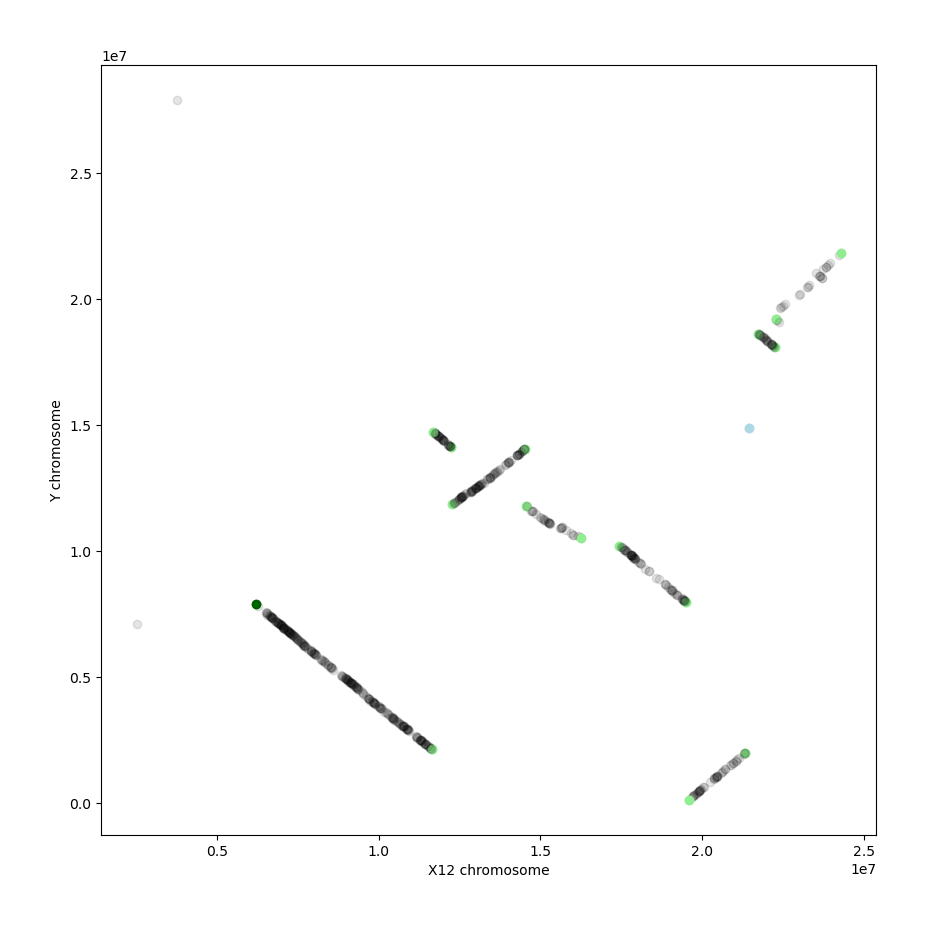

In [413]:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))

for pair in GaXGaY_one2ones:
    X_gene = pair[0]
    Y_gene = pair[1]
    
    if Ga_X_genes[X_gene]["CHROM"] == "chr12":
        X12POS = int(Ga_X_genes[X_gene]["START"])
        YPOS = int(Ga_Y_genes[Y_gene]["START"])
        
        plt.scatter(X12POS,YPOS, c = "black", alpha = 0.1)

        if 5000000 < X12POS < 6210000:
            plt.scatter(X12POS,YPOS, c = "green")
            print("*** #1a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 11637000 < X12POS < 11638000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #1b\t%s\t%s\t%s\t%s" % ( X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 11638000 < X12POS < 11688000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #2a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 12230000 < X12POS < 12250000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #2b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 12250000 < X12POS < 12284300:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #3a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 14520000 < X12POS < 14560000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #3b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 14560000 < X12POS < 14570000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #4a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 16250000 < X12POS < 16260000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #4b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
        
        elif 17400000 < X12POS < 17450000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #5a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 19490000 < X12POS < 19500000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #5b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 19500000 < X12POS < 19610000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #6a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 21320000 < X12POS < 21400000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #6b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 21440000 < X12POS < 21450000:
            plt.scatter(X12POS,YPOS, c = "lightblue")
            print("*** #7a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            print("*** #7b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 21700000 < X12POS < 21720000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #8a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 22240000 < X12POS < 22250000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #8b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 22260000 < X12POS < 22270000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #9a\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["START"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
            
        elif 24290000 < X12POS < 24300000:
            plt.scatter(X12POS,YPOS, c = "lightgreen")
            print("*** #9b\t%s\t%s\t%s\t%s" % (X_gene, Ga_X_genes[X_gene]["STOP"], Y_gene, Ga_Y_genes[Y_gene]["START"]))
    
    plt.ylabel("Y chromosome")
    plt.xlabel("X12 chromosome")
    
    
plt.show()

I will define the location of breakpoints as the point equidistant between the STOP of the last gene in the preceeding block and the START of the first gene of the proceeding block.

In [480]:
block_genes = {"X12_1":(int(Ga_X_genes["GaA_19594-RA"]["START"]), int(Ga_X_genes["GaA_20000-RA"]["STOP"])), 
               "X12_2":(int(Ga_X_genes["GaA_20003-RA"]["START"]), int(Ga_X_genes["GaA_20056-RA"]["STOP"])), 
               "X12_3":(int(Ga_X_genes["GaA_20062-RA"]["START"]), int(Ga_X_genes["GaA_20226-RA"]["STOP"])), 
               "X12_4":(int(Ga_X_genes["GaA_20228-RA"]["START"]), int(Ga_X_genes["GaA_20697-RA"]["STOP"])), 
               "X12_5":(int(Ga_X_genes["GaA_20761-RA"]["START"]), int(Ga_X_genes["GaA_20867-RA"]["STOP"])), 
               "X12_6":(int(Ga_X_genes["GaA_21108-RA"]["START"]), int(Ga_X_genes["GaA_20870-RA"]["STOP"])), 
               "X12_7":(int(Ga_X_genes["GaA_21111-RA"]["START"]), int(Ga_X_genes["GaA_21111-RA"]["STOP"])), 
               "X12_8":(int(Ga_X_genes["GaA_21228-RA"]["START"]), int(Ga_X_genes["GaA_21276-RA"]["STOP"])), 
               "X12_9":(int(Ga_X_genes["GaA_21278-RA"]["START"]), int(Ga_X_genes["GaA_21346-RA"]["STOP"]))}


In [467]:
def get_mid(_1b, _2a):
    c = _1b + (_2a-_1b)/2
    return int(np.round(c,0))

In [487]:
print("X12_1 / X12_2",get_mid(block_genes["X12_1"][1], block_genes["X12_2"][0]))
print("X12_2 / X12_3",get_mid(block_genes["X12_2"][1], block_genes["X12_3"][0]))
print("X12_3 / X12_4",get_mid(block_genes["X12_3"][1], block_genes["X12_4"][0]))
print("X12_4 /   -  ", Ga_X_genes["GaA_20697-RA"]["STOP"])
print("   -  / X12_5", Ga_X_genes["GaA_20761-RA"]["STOP"])
print("X12_5 / X12_6",get_mid(block_genes["X12_5"][1], block_genes["X12_6"][0]))
print("X12_6 / X12_7",get_mid(block_genes["X12_6"][1], block_genes["X12_7"][0]))
print("X12_7 / X12_7",get_mid(block_genes["X12_7"][0], block_genes["X12_7"][1])) ## single gene
print("X12_7 / X12_8",get_mid(block_genes["X12_7"][1], block_genes["X12_8"][0]))
print("X12_8 / X12_9",get_mid(block_genes["X12_8"][1], block_genes["X12_9"][0]))
print("X12_9 /   -  ", Ga_X_genes["GaA_21346-RA"]["STOP"])

X12_1 / X12_2 11664424
X12_2 / X12_3 12264954
X12_3 / X12_4 14551712
X12_4 /   -   16256548
   -  / X12_5 17460434
X12_5 / X12_6 20411526
X12_6 / X12_7 20534419
X12_7 / X12_7 21448783
X12_7 / X12_8 21584731
X12_8 / X12_9 22261798
X12_9 /   -   24303579


Ok, so these are our synteny block breakpoints! I may end up collapsing some of them, but this is the most exhaustive set.

## Multi-hit genes
So next I want to make a plot for the multiple hits . . . to see where they are

In [111]:
singleGaX_multiGaY

[('GwA_19813-RA', ['GwY_00223-RA', 'GwY_00224-RA']),
 ('GwA_30176-RA', ['GwY_00777-RA', 'GwY_00779-RA', 'GwY_00778-RA']),
 ('GwA_20039-RA', ['GwY_00714-RA', 'GwY_00713-RA']),
 ('GwA_29751-RA', ['GwY_00890-RA', 'GwY_00889-RA']),
 ('GwA_21324-RA', ['GwY_00861-RA', 'GwY_00860-RA', 'GwY_00862-RA']),
 ('GwA_20270-RA', ['GwY_00534-RA', 'GwY_00535-RA']),
 ('GwA_20261-RA', ['GwY_00543-RA', 'GwY_00544-RA', 'GwY_00546-RA']),
 ('GwA_29695-RA', ['GwY_00822-RA', 'GwY_00823-RA']),
 ('GwA_29750-RA', ['GwY_00888-RA', 'GwY_00887-RA']),
 ('GwA_19994-RA', ['GwY_00072-RA', 'GwY_00071-RA']),
 ('GwA_21113-RA', ['GwY_00748-RA', 'GwY_00747-RA']),
 ('GwA_21063-RA', ['GwY_00029-RA', 'GwY_00030-RA']),
 ('GwA_20855-RA', ['GwY_00432-RA', 'GwY_00433-RA']),
 ('GwA_19892-RA', ['GwY_00159-RA', 'GwY_00158-RA']),
 ('GwA_29742-RA', ['GwY_00884-RA', 'GwY_00883-RA']),
 ('GwA_30785-RA', ['GwY_00826-RA', 'GwY_00827-RA']),
 ('GwA_30370-RA', ['GwY_00757-RA', 'GwY_00758-RA']),
 ('GwA_21242-RA', ['GwY_00809-RA', 'GwY_00810-RA'])

In [113]:
with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/GaXsingle_GaYmulti.blocks", 'w') as GaX_GaY_blocks:

    for orthogroup in singleGaX_multiGaY:
        ## get chrom of each gene
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_gene = orthogroup[0]
        
        for Y_gene in orthogroup[1]:
            if X_chrom == "chr12":
                GaX_GaY_blocks.write("%s\t%s\t%s\n" % (Y_gene, X_gene, "."))
                                 
            elif X_chrom == "chr19":
                GaX_GaY_blocks.write("%s\t%s\t%s\n" % (Y_gene, ".", X_gene))

# Distributions of genes across strata - relative to X
- How many are on each stratum? 
- how many genes in total involved

### Strata - note these are out of date now! 

In [272]:
## Strata

Ga_S1 = ("chr19", 14690000, 25000000)
SW2 = ("chr19", 0, 14690000)
SW3 = ("chr12", 21590000, 25000000)
SW4 = ("chr12", 12050000, 21590000)
SW5 = ("chr12", 6350000, 12050000 )
Ga_PAR = ("chr12", 0, 6350000)
df = 1

## 1-1 orthologs (i.e. genes retained) 

Note, here I am assuming that if an X gene has a 1-1 ortholog, then it is a retained gene that existed on the Y before it became sex linked. However, this may not be true in all cases. For example Y gene may have been duplicated, and one duplicate subsequently lost. But it is going to be very difficult to distinguish such scenarios. 

In [273]:
import numpy as np

counter = 0

Ga_S1_genes = []
SW2_genes = []
SW3_genes = []
SW4_genes = []
SW5_genes = []
Ga_PAR_genes = []

Ga_S1_genes_retained = []
SW2_genes_retained = []
SW3_genes_retained = []
SW4_genes_retained = []
SW5_genes_retained = []
Ga_PAR_genes_retained = []

for gene in Ga_X_genes:
    
    ## S1
    if all([Ga_X_genes[gene]["CHROM"] == Ga_S1[0], Ga_S1[1] <= int(Ga_X_genes[gene]["START"]) < Ga_S1[2]]):
        Ga_S1_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                Ga_S1_genes_retained.append(gene)
    ## SW2
    elif all([Ga_X_genes[gene]["CHROM"] == SW2[0], SW2[1] <= int(Ga_X_genes[gene]["START"]) < SW2[2]]):
        SW2_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                SW2_genes_retained.append(gene)
    
    ## SW3
    elif all([Ga_X_genes[gene]["CHROM"] == SW3[0], SW3[1] <= int(Ga_X_genes[gene]["START"]) < SW3[2]]):
        SW3_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                SW3_genes_retained.append(gene)
    
    ## SW4
    elif all([Ga_X_genes[gene]["CHROM"] == SW4[0], SW4[1] <= int(Ga_X_genes[gene]["START"]) < SW4[2]]):
        SW4_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                SW4_genes_retained.append(gene)
                
    ## SW5
    elif all([Ga_X_genes[gene]["CHROM"] == SW5[0], SW5[1] <= int(Ga_X_genes[gene]["START"]) < SW5[2]]):
        SW5_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                SW5_genes_retained.append(gene)
                
    ## PAR
    elif all([Ga_X_genes[gene]["CHROM"] == Ga_PAR[0], Ga_PAR[1] <= int(Ga_X_genes[gene]["START"]) < Ga_PAR[2]]):
        Ga_PAR_genes.append(gene)
        for orthologs in GaXGaY_one2ones:
            if gene in orthologs:
                Ga_PAR_genes_retained.append(gene)
                
            
Ga_total_X_genes = len(Ga_S1_genes) + len(SW2_genes) + len(SW3_genes) + len(SW4_genes) + len(SW5_genes)
Ga_total_retained = len(Ga_S1_genes_retained) + len(SW2_genes_retained) + len(SW3_genes_retained) + len(SW4_genes_retained) + len(SW5_genes_retained)

print("%s out of %s (%s%%) genes were retained in single copy on the sex linked region of Ga Y (Chr19 and Chr12))" % (Ga_total_retained, Ga_total_X_genes, np.round((Ga_total_retained/Ga_total_X_genes)*100)))

print("    %s out of %s (%s%%) genes were retained on Ga S1 (Chr19)" % (len(Ga_S1_genes_retained), len(Ga_S1_genes), np.round(len(Ga_S1_genes_retained)/len(Ga_S1_genes)*100, 2)))
print("    %s out of %s (%s%%) genes were retained on SW2 (Chr19)" % (len(SW2_genes_retained), len(SW2_genes), np.round((len(SW2_genes_retained)/len(SW2_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were retained on SW3 (Chr12)" % (len(SW3_genes_retained), len(SW3_genes), np.round((len(SW3_genes_retained)/len(SW3_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were retained on SW4 (Chr12)" % (len(SW4_genes_retained), len(SW4_genes), np.round((len(SW4_genes_retained)/len(SW4_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were retained on SW5 (Chr12)" % (len(SW5_genes_retained), len(SW5_genes), np.round((len(SW5_genes_retained)/len(SW5_genes))*100, 2)))

print("\n%s out of %s (%s%%) genes were retained on Ga PAR (Chr12)" % (len(Ga_PAR_genes_retained), len(Ga_PAR_genes), np.round((len(Ga_PAR_genes_retained)/len(Ga_PAR_genes))*100, 2)))

628 out of 2085 (30.0%) genes were retained in single copy on the sex linked region of Gw Y (Chr19 and Chr12))
    16 out of 509 (3.14%) genes were retained on Gw S1 (Chr19)
    54 out of 637 (8.48%) genes were retained on SW2 (Chr19)
    53 out of 89 (59.55%) genes were retained on SW3 (Chr12)
    237 out of 463 (51.19%) genes were retained on SW4 (Chr12)
    268 out of 387 (69.25%) genes were retained on SW5 (Chr12)

6 out of 324 (1.85%) genes were retained on Gw PAR (Chr12)


## LOST GENES

In [48]:
Ga_S1_genes = []
SW2_genes = []
SW3_genes = []
SW4_genes = []
SW5_genes = []
PAR_genes = []

Ga_S1_genes_lost = []
SW2_genes_lost = []
SW3_genes_lost = []
SW4_genes_lost = []
SW5_genes_lost = []
PAR_genes_lost = []

for gene in Ga_X_genes:
    
    ## S1
    if all([Ga_X_genes[gene]["CHROM"] == Ga_S1[0], Ga_S1[1] <= int(Ga_X_genes[gene]["START"]) < Ga_S1[2]]):
        Ga_S1_genes.append(gene)
        if gene in Ga_Y_lost:
            Ga_S1_genes_lost.append(gene)
    ## SW2
    elif all([Ga_X_genes[gene]["CHROM"] == SW2[0], SW2[1] <= int(Ga_X_genes[gene]["START"]) < SW2[2]]):
        SW2_genes.append(gene)
        if gene in Ga_Y_lost:
            SW2_genes_lost.append(gene)
    
    ## SW3
    elif all([Ga_X_genes[gene]["CHROM"] == SW3[0], SW3[1] <= int(Ga_X_genes[gene]["START"]) < SW3[2]]):
        SW3_genes.append(gene)
        if gene in Ga_Y_lost:
            SW3_genes_lost.append(gene)
    
    ## SW4
    elif all([Ga_X_genes[gene]["CHROM"] == SW4[0], SW4[1] <= int(Ga_X_genes[gene]["START"]) < SW4[2]]):
        SW4_genes.append(gene)
        if gene in Ga_Y_lost:
            SW4_genes_lost.append(gene)
                
    ## SW5
    elif all([Ga_X_genes[gene]["CHROM"] == SW5[0], SW5[1] <= int(Ga_X_genes[gene]["START"]) < SW5[2]]):
        SW5_genes.append(gene)
        if gene in Ga_Y_lost:
            SW5_genes_lost.append(gene)
            
    ## PAR
    elif all([Ga_X_genes[gene]["CHROM"] == Ga_PAR[0], Ga_PAR[1] <= int(Ga_X_genes[gene]["START"]) < Ga_PAR[2]]):
        PAR_genes.append(gene)
        if gene in Ga_Y_lost:
            PAR_genes_lost.append(gene)
            
Ga_total_X_genes = len(Ga_S1_genes) + len(SW2_genes) + len(SW3_genes) + len(SW4_genes) + len(SW5_genes) + len(PAR_genes)
Ga_total_lost = len(Ga_S1_genes_lost) + len(SW2_genes_lost) + len(SW3_genes_lost) + len(SW4_genes_lost) + len(SW5_genes_lost) + len(PAR_genes_lost)

print("%s out of %s (%s%%) genes were lost on the Ga Y (Chr19 and Chr12))" % (Ga_total_lost, Ga_total_X_genes, np.round((Ga_total_lost/Ga_total_X_genes)*100)))

print("    %s out of %s (%s%%) genes were lost from Ga S1 (Chr19)" % (len(Ga_S1_genes_lost), len(Ga_S1_genes), np.round(len(Ga_S1_genes_lost)/len(Ga_S1_genes)*100, 2)))
print("    %s out of %s (%s%%) genes were lost from SW2 (Chr19)" % (len(SW2_genes_lost), len(SW2_genes), np.round((len(SW2_genes_lost)/len(SW2_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were lost from SW3 (Chr12)" % (len(SW3_genes_lost), len(SW3_genes), np.round((len(SW3_genes_lost)/len(SW3_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were lost from SW4 (Chr12)" % (len(SW4_genes_lost), len(SW4_genes), np.round((len(SW4_genes_lost)/len(SW4_genes))*100, 2)))
print("    %s out of %s (%s%%) genes were lost from SW5 (Chr12)" % (len(SW5_genes_lost), len(SW5_genes), np.round((len(SW5_genes_lost)/len(SW5_genes))*100, 2)))

print("\n%s out of %s (%s%%) genes were lost from the PAR (Chr12)" % (len(PAR_genes_lost), len(PAR_genes), np.round((len(PAR_genes_lost)/len(PAR_genes))*100, 2)))

1045 out of 2469 (42.0%) genes were lost on the Gw Y (Chr19 and Chr12))
    452 out of 553 (81.74%) genes were lost from Gw S1 (Chr19)
    487 out of 653 (74.58%) genes were lost from SW2 (Chr19)
    19 out of 94 (20.21%) genes were lost from SW3 (Chr12)
    30 out of 486 (6.17%) genes were lost from SW4 (Chr12)
    25 out of 364 (6.87%) genes were lost from SW5 (Chr12)

32 out of 319 (10.03%) genes were lost from the PAR (Chr12)


<b>Are these PAR genes really lost?? Is this the false positive rate of loss based on annotations perhaps? </b>

## Genes gained (1 X copy, >1 Y copy)

In [49]:
S1_expanded_orthogroups = 0
S2_expanded_orthogroups = 0
S3_expanded_orthogroups = 0
S4_expanded_orthogroups = 0
S5_expanded_orthogroups = 0
Ga_PAR_expanded_orthogroups = 0

Ga_S1_genes_gained = []
Ga_S2_genes_gained = []
Ga_S3_genes_gained = []
Ga_S4_genes_gained = []
Ga_S5_genes_gained = []
Ga_PAR_genes_gained = []

for orthogroup in singleGaX_multiGaY:
  
    if all([Ga_X_genes[orthogroup[0]]["CHROM"] == Ga_S1[0], Ga_S1[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < Ga_S1[2]]):
        S1_expanded_orthogroups += 1
        Ga_S1_genes_gained += [i for i in orthogroup[1]]
                                                                   
    elif all([Ga_X_genes[orthogroup[0]]["CHROM"] == SW2[0], SW2[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < SW2[2]]):
        S2_expanded_orthogroups += 1
        Ga_S2_genes_gained += [i for i in orthogroup[1]]
        #print(orthogroup[1])
                                                                   
    elif all([Ga_X_genes[orthogroup[0]]["CHROM"] == SW3[0], SW3[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < SW3[2]]):
        S3_expanded_orthogroups += 1
        Ga_S3_genes_gained += [i for i in orthogroup[1]]
                                                                   
    elif all([Ga_X_genes[orthogroup[0]]["CHROM"] == SW4[0], SW4[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < SW4[2]]):
        S4_expanded_orthogroups += 1
        Ga_S4_genes_gained += [i for i in orthogroup[1]]
                                                                   
    elif all([Ga_X_genes[orthogroup[0]]["CHROM"] == SW5[0], SW5[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < SW5[2]]):
        S5_expanded_orthogroups += 1
        Ga_S5_genes_gained += [i for i in orthogroup[1]]
        
    elif all([Ga_X_genes[orthogroup[0]]["CHROM"] == Ga_PAR[0], Ga_PAR[1] <= int(Ga_X_genes[orthogroup[0]]["START"]) < Ga_PAR[2]]):
        Ga_PAR_expanded_orthogroups += 1
        Ga_PAR_genes_gained += [i for i in orthogroup[1]]


print("%s orthogroups (comprising %s Y genes) showed signs of expansion on Chr19 vs only 1 copy on the X" % ((S1_expanded_orthogroups + S2_expanded_orthogroups), (len(Ga_S1_genes_gained)+len(Ga_S2_genes_gained))))       
print("   %s orthogroups (comprising %s Y genes) showed signs of expansion (2 or more copies) on the Chr19 Y S1 vs only 1 copy on the X" % (S1_expanded_orthogroups, len(Ga_S1_genes_gained)))
print("   %s orthogroups (comprising %s Y genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the X" % (S2_expanded_orthogroups, len(Ga_S2_genes_gained)))

print("\n%s orthogroups (comprising %s Y genes) showed signs of expansion on Chr12 vs only 1 copy on the X" % ((S3_expanded_orthogroups + S4_expanded_orthogroups + S5_expanded_orthogroups), (len(Ga_S3_genes_gained)+len(Ga_S4_genes_gained)+len(Ga_S5_genes_gained))))       
print("   %s orthogroups (comprising %s Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW3 vs only 1 copy on the X" % (S3_expanded_orthogroups, len(Ga_S3_genes_gained)))
print("   %s orthogroups (comprising %s Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW4 vs only 1 copy on the X" % (S4_expanded_orthogroups, len(Ga_S4_genes_gained)))
print("   %s orthogroups (comprising %s Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW5 vs only 1 copy on the X" % (S5_expanded_orthogroups, len(Ga_S5_genes_gained)))

print("\n%s orthogroups (comprising %s Y genes) showed signs of expansion in the Y PAR vs only 1 copy on the X PAR region" % (Ga_PAR_expanded_orthogroups, len(Ga_PAR_genes_gained)))       
    

11 orthogroups (comprising 25 Y genes) showed signs of expansion on Chr19 vs only 1 copy on the X
   2 orthogroups (comprising 5 Y genes) showed signs of expansion (2 or more copies) on the Chr19 Y S1 vs only 1 copy on the X
   9 orthogroups (comprising 20 Y genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the X

49 orthogroups (comprising 105 Y genes) showed signs of expansion on Chr12 vs only 1 copy on the X
   5 orthogroups (comprising 10 Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW3 vs only 1 copy on the X
   26 orthogroups (comprising 57 Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW4 vs only 1 copy on the X
   18 orthogroups (comprising 38 Y genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW5 vs only 1 copy on the X

24 orthogroups (comprising 51 Y genes) showed signs of expansion in the Y PAR vs only 1 copy on the X PAR region


<b>Again, some weird stuff going on in the PAR here</b>

## Multi - Multi

In [50]:
S1_multiX_multiY_orthogroups = 0
S2_multiX_multiY_orthogroups = 0
S3_multiX_multiY_orthogroups = 0
S4_multiX_multiY_orthogroups = 0
S5_multiX_multiY_orthogroups = 0
Ga_PAR_multiX_multiY_orthogroups = 0

Ga_S1_multiX_multiY_genes = []
Ga_S2_multiX_multiY_genes = []
Ga_S3_multiX_multiY_genes = []
Ga_S4_multiX_multiY_genes = []
Ga_S5_multiX_multiY_genes = []
Ga_PAR_multiX_multiY_genes = []

for orthogroup in multiGaX_multiGaY:
            
    orthogroup_recorded = False
    
    for gene in orthogroup[0]:
    
        if all([Ga_X_genes[gene]["CHROM"] == Ga_S1[0], Ga_S1[1] <= int(Ga_X_genes[gene]["START"]) < Ga_S1[2]]):
            if orthogroup_recorded == False:
                S1_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S1_multiX_multiY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW2[0], SW2[1] <= int(Ga_X_genes[gene]["START"]) < SW2[2]]):
            if orthogroup_recorded == False:
                S2_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S2_multiX_multiY_genes.append(gene)
            

        elif all([Ga_X_genes[gene]["CHROM"] == SW3[0], SW3[1] <= int(Ga_X_genes[gene]["START"]) < SW3[2]]):
            if orthogroup_recorded == False:
                S3_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S3_multiX_multiY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW4[0], SW4[1] <= int(Ga_X_genes[gene]["START"]) < SW4[2]]):
            if orthogroup_recorded == False:
                S4_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S4_multiX_multiY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW5[0], SW5[1] <= int(Ga_X_genes[gene]["START"]) < SW5[2]]):
            if orthogroup_recorded == False:
                S5_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S5_multiX_multiY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == Ga_PAR[0], Ga_PAR[1] <= int(Ga_X_genes[gene]["START"]) < Ga_PAR[2]]):
            if orthogroup_recorded == False:
                Ga_PAR_multiX_multiY_orthogroups += 1
                orthogroup_recorded = True
            Ga_PAR_multiX_multiY_genes.append(gene)


print("%s orthogroups (comprising %s X genes) showed signs of expansion on Chr19 vs only 1 copy on the X" % ((S1_multiX_multiY_orthogroups + S2_multiX_multiY_orthogroups), (len(Ga_S1_multiX_multiY_genes)+len(Ga_S2_multiX_multiY_genes))))    
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr19 Y S1 vs only 1 copy on the X" % (S1_multiX_multiY_orthogroups, len(Ga_S1_multiX_multiY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the X" % (S2_multiX_multiY_orthogroups, len(Ga_S2_multiX_multiY_genes)))
print("\n%s orthogroups (comprising %s X genes) showed signs of expansion on Chr12 vs only 1 copy on the X" % ((S3_multiX_multiY_orthogroups + S4_multiX_multiY_orthogroups + S5_multiX_multiY_orthogroups), (len(Ga_S3_multiX_multiY_genes)+len(Ga_S4_multiX_multiY_genes)+len(Ga_S5_multiX_multiY_genes))))       
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW3 vs only 1 copy on the X" % (S3_multiX_multiY_orthogroups, len(Ga_S3_multiX_multiY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW4 vs only 1 copy on the X" % (S4_multiX_multiY_orthogroups, len(Ga_S4_multiX_multiY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW5 vs only 1 copy on the X" % (S5_multiX_multiY_orthogroups, len(Ga_S5_multiX_multiY_genes)))

print("\n%s orthogroups (comprising %s X genes) showed signs of expansion on Chr19 vs only 1 copy in the PAR region" % (Ga_PAR_multiX_multiY_orthogroups, len(Ga_PAR_multiX_multiY_genes)))   

7 orthogroups (comprising 17 X genes) showed signs of expansion on Chr19 vs only 1 copy on the X
   3 orthogroups (comprising 6 X genes) showed signs of expansion (2 or more copies) on the Chr19 Y S1 vs only 1 copy on the X
   4 orthogroups (comprising 11 X genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the X

30 orthogroups (comprising 66 X genes) showed signs of expansion on Chr12 vs only 1 copy on the X
   2 orthogroups (comprising 4 X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW3 vs only 1 copy on the X
   20 orthogroups (comprising 41 X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW4 vs only 1 copy on the X
   8 orthogroups (comprising 21 X genes) showed signs of expansion (2 or more copies) on the Chr12 Y SW5 vs only 1 copy on the X

6 orthogroups (comprising 13 X genes) showed signs of expansion on Chr19 vs only 1 copy in the PAR region


## Multi - 1

In [51]:
S1_multiX_singleY_orthogroups = 0
S2_multiX_singleY_orthogroups = 0
S3_multiX_singleY_orthogroups = 0
S4_multiX_singleY_orthogroups = 0
S5_multiX_singleY_orthogroups = 0
Ga_PAR_multiX_singleY_orthogroups = 0

Ga_S1_multiX_singleY_genes = []
Ga_S2_multiX_singleY_genes = []
Ga_S3_multiX_singleY_genes = []
Ga_S4_multiX_singleY_genes = []
Ga_S5_multiX_singleY_genes = []
Ga_PAR_multiX_singleY_genes = []

for orthogroup in multiGaX_singleGaY:
            
    orthogroup_recorded = False
    
    for gene in orthogroup[0]:
    
        if all([Ga_X_genes[gene]["CHROM"] == Ga_S1[0], Ga_S1[1] <= int(Ga_X_genes[gene]["START"]) < Ga_S1[2]]):
            if orthogroup_recorded == False:
                S1_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S1_multiX_singleY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW2[0], SW2[1] <= int(Ga_X_genes[gene]["START"]) < SW2[2]]):
            if orthogroup_recorded == False:
                S2_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S2_multiX_singleY_genes.append(gene)
            

        elif all([Ga_X_genes[gene]["CHROM"] == SW3[0], SW3[1] <= int(Ga_X_genes[gene]["START"]) < SW3[2]]):
            if orthogroup_recorded == False:
                S3_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S3_multiX_singleY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW4[0], SW4[1] <= int(Ga_X_genes[gene]["START"]) < SW4[2]]):
            if orthogroup_recorded == False:
                S4_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S4_multiX_singleY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == SW5[0], SW5[1] <= int(Ga_X_genes[gene]["START"]) < SW5[2]]):
            if orthogroup_recorded == False:
                S5_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_S5_multiX_singleY_genes.append(gene)

        elif all([Ga_X_genes[gene]["CHROM"] == Ga_PAR[0], Ga_PAR[1] <= int(Ga_X_genes[gene]["START"]) < Ga_PAR[2]]):
            if orthogroup_recorded == False:
                Ga_PAR_multiX_singleY_orthogroups += 1
                orthogroup_recorded = True
            Ga_PAR_multiX_singleY_genes.append(gene)


print("%s orthogroups (comprising %s X genes) showed signs of expansion on the Chr19 X vs only 1 copy on the Y" % ((S1_multiX_singleY_orthogroups + S2_multiX_singleY_orthogroups), (len(Ga_S1_multiX_singleY_genes)+len(Ga_S2_multiX_singleY_genes))))    
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr19 X S1 vs only 1 copy on the Y" % (S1_multiX_singleY_orthogroups, len(Ga_S1_multiX_singleY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the Y" % (S2_multiX_singleY_orthogroups, len(Ga_S2_multiX_singleY_genes)))
print("\n%s orthogroups (comprising %s X genes) showed signs of expansion on the Chr12 X vs only 1 copy on the Y" % ((S3_multiX_singleY_orthogroups + S4_multiX_singleY_orthogroups + S5_multiX_singleY_orthogroups), (len(Ga_S3_multiX_singleY_genes)+len(Ga_S4_multiX_singleY_genes)+len(Ga_S5_multiX_singleY_genes))))       
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW3 vs only 1 copy on the Y" % (S3_multiX_singleY_orthogroups, len(Ga_S3_multiX_singleY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW4 vs only 1 copy on the Y" % (S4_multiX_singleY_orthogroups, len(Ga_S4_multiX_singleY_genes)))
print("   %s orthogroups (comprising %s X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW5 vs only 1 copy on the Y" % (S5_multiX_singleY_orthogroups, len(Ga_S5_multiX_singleY_genes)))

print("\n%s orthogroups (comprising %s X genes) showed signs of expansion on Chr19 vs only 1 copy in the PAR region" % (Ga_PAR_multiX_singleY_orthogroups, len(Ga_PAR_multiX_singleY_genes)))   

10 orthogroups (comprising 21 X genes) showed signs of expansion on the Chr19 X vs only 1 copy on the Y
   2 orthogroups (comprising 4 X genes) showed signs of expansion (2 or more copies) on the Chr19 X S1 vs only 1 copy on the Y
   8 orthogroups (comprising 17 X genes) showed signs of expansion (2 or more copies) on the Chr19 Y SW2 vs only 1 copy on the Y

35 orthogroups (comprising 72 X genes) showed signs of expansion on the Chr12 X vs only 1 copy on the Y
   3 orthogroups (comprising 6 X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW3 vs only 1 copy on the Y
   21 orthogroups (comprising 44 X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW4 vs only 1 copy on the Y
   11 orthogroups (comprising 22 X genes) showed signs of expansion (2 or more copies) on the Chr12 X SW5 vs only 1 copy on the Y

18 orthogroups (comprising 36 X genes) showed signs of expansion on Chr19 vs only 1 copy in the PAR region


## Whats going on with the PAR genes? 

1-1 = 200  
1-many = 24  
many - many = 13  
many-1 = 36  
lost = 25  

= 298

That leaves 319-298 = 21 genes, where are they?

But this is a bit worrying in general! Can we trust the orthology / annotations??

<b>We need to do some protein to DNA alignments here</b>

# Outputting data for circos plots

## First, just the gene positions

In [64]:
chroms = ["chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr13", "chr14","chr15","chr16","chr17","chr18","chr20","chr21"]

with open("/home/djeffrie/Data/Stickleback/Y_chrom_comp/OrthoFinder/Circos/Gene_positions.txt", 'w') as gene_positions:
    
    gene_positions.write("GENE\tCHROM\tSTART\n")

    for chrom in chroms:  
        for gene in Ga_auto_genes:
            if Ga_auto_genes[gene]["CHROM"] == chrom:
                gene_positions.write("%s\t%s\t%s\n" % (gene, Ga_auto_genes[gene]["CHROM"], Ga_auto_genes[gene]["START"]))
        
        
    for gene in Ga_X_genes:
        gene_positions.write("%s\t%s\t%s\n" % (gene, Ga_X_genes[gene]["CHROM"], Ga_X_genes[gene]["START"]))
    
    for gene in Ga_Y_genes:
        gene_positions.write("%s\t%s\t%s\n" % (gene, Ga_Y_genes[gene]["CHROM"], Ga_Y_genes[gene]["START"]))
    

## Next the links for the 1-1 X-Y homologs

In [74]:
with open("/home/djeffrie/Data/Stickleback/Y_chrom_comp/OrthoFinder/Circos/one2one_orthologs.txt", 'w') as links_one2ones:
    
    links_one2ones.write("CHROM1\tPOS1\tCHROM2\tPOS2\n")
    
    for orthogroup in GaXGaY_one2ones:
        
        X_gene = orthogroup[0]
        Y_gene = orthogroup[1]
        
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        Y_pos = Ga_Y_genes[Y_gene]["START"]
        
        
        links_one2ones.write("%s\t%s\t%s\t%s\n" % (X_chrom, X_pos, "chrY", Y_pos))
        

## Next the links for the 1-many X/Y orthologs. 

In [79]:
with open("/home/djeffrie/Data/Stickleback/Y_chrom_comp/OrthoFinder/Circos/one2many_orthologs.txt", 'w') as links_one2many:
    
    links_one2many.write("CHROM1\tPOS1\tCHROM2\tPOS2\n")
    
    for orthogroup in singleGaX_multiGaY:
        
        X_gene = orthogroup[0]
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        
        Y_genes = orthogroup[1]
        
        for Y_gene in Y_genes:
                   
            Y_pos = Ga_Y_genes[Y_gene]["START"]
            
            links_one2many.write("%s\t%s\t%s\t%s\n" % (X_chrom, X_pos, "chrY", Y_pos))

# Output data for further analyses

## 1-1s  (including autosomes)

In [236]:
with open("%s/data/Orthology/Ga_outputs/GaX_GaY_one2ones.tsv" % wd, 'w') as links_one2ones:
    
    links_one2ones.write("GENE_1_ID\tCHROM_1\tPOS_1\tY_GENE_ID\tCHROM_2\tPOS_Y\n")
    
    for orthogroup in GaXGaY_one2ones:
        
        X_gene = orthogroup[0]
        Y_gene = orthogroup[1]
        
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        Y_pos = Ga_Y_genes[Y_gene]["START"]
        
        
        links_one2ones.write("%s\t%s\t%s\t%s\t%s\t%s\n" % (X_gene, X_chrom, X_pos, Y_gene, "chrY", Y_pos))
        
  

## 1-1s  (including autosomes)

In [67]:
with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/Orthofinder_Results_Oct16_pep/Output_genelists_DLJ/Ga/Ga_XY_1-1s.txt", 'w') as links_one2ones:
    
    links_one2ones.write("GENE_1_ID\tCHROM_1\tPOS_1\tY_GENE_ID\tCHROM_2\tPOS_Y\n")
    
    for orthogroup in GaXGaY_one2ones:
        
        X_gene = orthogroup[0]
        Y_gene = orthogroup[1]
        
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        Y_pos = Ga_Y_genes[Y_gene]["START"]
        
        
        links_one2ones.write("%s\t%s\t%s\t%s\t%s\t%s\n" % (X_gene, X_chrom, X_pos, Y_gene, "chrY", Y_pos))
        
    for orthogroup in GaAutoGaY_one2ones:
        
        Auto_gene = orthogroup[0]
        Y_gene = orthogroup[1]
        
        Auto_chrom = Ga_auto_genes[Auto_gene]["CHROM"]
        Auto_pos = Ga_auto_genes[Auto_gene]["START"]
        Y_pos = Ga_Y_genes[Y_gene]["START"]
        
        
        links_one2ones.write("%s\t%s\t%s\t%s\t%s\t%s\n" % (Auto_gene, Auto_chrom, Auto_pos, Y_gene, "chrY", Y_pos))

## 1-many (none from autosomes)

In [69]:
with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/Orthofinder_Results_Oct16_pep/Output_genelists_DLJ/Ga/Ga_XY_1-many.txt", 'w') as links_one2many:
    
    links_one2many.write("GENE_1_ID\tCHROM_1\tPOS_1\tY_GENE_ID\tCHROM_2\tPOS_Y\n")
    
    for orthogroup in singleGaX_multiGaY:
        
        X_gene = orthogroup[0]
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        
        Y_genes = orthogroup[1]
        
        for Y_gene in Y_genes:
                   
            Y_pos = Ga_Y_genes[Y_gene]["START"]
            
            links_one2many.write("%s\t%s\t%s\t%s\t%s\t%s\n" % (X_gene,X_chrom, X_pos,Y_gene, "chrY", Y_pos))


# Genes lost from the Y

In [70]:
with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/Orthofinder_Results_Oct16_pep/Output_genelists_DLJ/Ga/Ga_Y_lost.txt", 'w') as Ylost_out:
    
    Ylost_out.write("X_GENE_ID\tCHROM\tX_POS\tANC\n")
    
    for X_gene in Ga_Y_lost:
               
        X_chrom = Ga_X_genes[X_gene]["CHROM"]
        X_pos = Ga_X_genes[X_gene]["START"]
        
        if X_gene in Ga_Y_lost_anc:
            Ylost_out.write("%s\t%s\t%s\t%s\n" % (X_gene, X_chrom, X_pos, "TRUE"))
        else:
            Ylost_out.write("%s\t%s\t%s\t%s\n" % (X_gene, X_chrom, X_pos, "FALSE"))
        


### Relating gene loss to male / female expression (fitness effects?)

It has been hypothesised by Connallon et al, that gene loss from the Y chromosome could be influenced by the whether or not genes have sex-biased fitness effects. Specifically, genes which have a little effect on fitness in males should be lost from the Y more readily. 

Here I will use sex-biased expression as a proxy for sex biased fitness effects. 

The hypothesis is that genes with female-biased expression should be lost from the Y faster than those with equal or male-biased expression.

I have a list of sex-biased genes from threespine (from Carlos). The expectation is that genes that are sex biased in threespine should also be in blackspotted, though this is not known for sure. 


First, I need to match the threespine gene names with the blackspotted - I will try to do this with the ENSEMBL ID's for the genes. 

I converted the gene IDs from Carlos' DEG analyses into protein IDs (which is what I have in the annotation)

- make dictionary relating gene and protein IDs
- include logFoldChange in there

In [251]:
DEG_P_IDs = {} 

with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/DEG_analysis/DEG_ENS_P_IDs.txt") as DEG_ENS_P_IDs:
    
    for line in DEG_ENS_P_IDs:
        if len(line.split()) == 2:
            DEG_P_IDs[line.split()[0].strip()] =  {} ## add fold change to this at some point
            DEG_P_IDs[line.split()[0].strip()]["ENS_G_ID"] = line.split()[1].strip()        
            
    
with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/DEG_analysis/DEGs_sex_all_formatted.csv", 'r') as Ga_DEGs:
      
    next(Ga_DEGs) ## pass header

    for line in Ga_DEGs:
        ENS_ID = line.split()[0]
        logFC = line.split()[6]
        
        for protein in DEG_P_IDs:
            if ENS_ID == DEG_P_IDs[protein]["ENS_G_ID"]:
                DEG_P_IDs[protein]["logFC"] = logFC
          
        

In [168]:
DEG_P_IDs

{'ENSGACP00000000015': {'ENS_G_ID': 'ENSGACG00000000011',
  'logFC': '0,248672726641066'},
 'ENSGACP00000000087': {'ENS_G_ID': 'ENSGACG00000000069',
  'logFC': '0,16109189537094'},
 'ENSGACP00000000187': {'ENS_G_ID': 'ENSGACG00000000142',
  'logFC': '0,759441057778598'},
 'ENSGACP00000000189': {'ENS_G_ID': 'ENSGACG00000000144',
  'logFC': '0,686639708061512'},
 'ENSGACP00000000241': {'ENS_G_ID': 'ENSGACG00000000186',
  'logFC': '0,2043497090692'},
 'ENSGACP00000000396': {'ENS_G_ID': 'ENSGACG00000000311',
  'logFC': '-0,244797066200936'},
 'ENSGACP00000000400': {'ENS_G_ID': 'ENSGACG00000000311',
  'logFC': '-0,244797066200936'},
 'ENSGACP00000000438': {'ENS_G_ID': 'ENSGACG00000000347',
  'logFC': '0,130597051569928'},
 'ENSGACP00000000440': {'ENS_G_ID': 'ENSGACG00000000347',
  'logFC': '0,130597051569928'},
 'ENSGACP00000000455': {'ENS_G_ID': 'ENSGACG00000000353',
  'logFC': '0,470185181429129'},
 'ENSGACP00000000638': {'ENS_G_ID': 'ENSGACG00000000497',
  'logFC': '0,59821853519511'},
 

In [252]:
## Get ensmble IDs for our annoted genes and add position info

Ga_P_IDs_positions = {}
count = 0

with open("/home/djeffrie/Dropbox/Sexy_sticklebacks/Y_chrom_comp/Gene_traffic_Nov23/DEG_analysis/Ga.annotation.emapper.annotations" , 'r') as Ga_A_annotations:
    
    next(Ga_A_annotations)
    
    for line in Ga_A_annotations:
        if not line.startswith("#"):
            Annotation_ID = line.split()[0]
            ENS_ID = line.split()[1].split(".")[1]
            Ga_P_IDs_positions[ENS_ID] = {}
            Ga_P_IDs_positions[ENS_ID]["annoID"] = Annotation_ID
                
            if Annotation_ID in Ga_X_genes:
        
                Ga_P_IDs_positions[ENS_ID]["CHROM"] = Ga_X_genes[Annotation_ID]["CHROM"]
                Ga_P_IDs_positions[ENS_ID]["START"] = Ga_X_genes[Annotation_ID]["START"]
                Ga_P_IDs_positions[ENS_ID]["STOP"] = Ga_X_genes[Annotation_ID]["STOP"]
                
            elif Annotation_ID in Ga_auto_genes:
        
                Ga_P_IDs_positions[ENS_ID]["CHROM"] = Ga_auto_genes[Annotation_ID]["CHROM"]
                Ga_P_IDs_positions[ENS_ID]["START"] = Ga_auto_genes[Annotation_ID]["START"]
                Ga_P_IDs_positions[ENS_ID]["STOP"] = Ga_auto_genes[Annotation_ID]["STOP"]
                
            else:
                count += 1
print(count, "not found")

78 not found


In [253]:
len(Ga_P_IDs_positions)

21094

Ok, so I have all the info I need - lets look to see whats going on with the Y-lost genes. . . 

For genes that have been lost from the Y, I need:

```
ENS_P_ID, ENS_G_ID, ANNO_ID, IDs, CHROM, START, STOP, logFC
```




In [227]:
DEG_P_IDs

{'ENSGACP00000000015': {'ENS_G_ID': 'ENSGACG00000000011',
  'logFC': '0,248672726641066'},
 'ENSGACP00000000087': {'ENS_G_ID': 'ENSGACG00000000069',
  'logFC': '0,16109189537094'},
 'ENSGACP00000000187': {'ENS_G_ID': 'ENSGACG00000000142',
  'logFC': '0,759441057778598'},
 'ENSGACP00000000189': {'ENS_G_ID': 'ENSGACG00000000144',
  'logFC': '0,686639708061512'},
 'ENSGACP00000000241': {'ENS_G_ID': 'ENSGACG00000000186',
  'logFC': '0,2043497090692'},
 'ENSGACP00000000396': {'ENS_G_ID': 'ENSGACG00000000311',
  'logFC': '-0,244797066200936'},
 'ENSGACP00000000400': {'ENS_G_ID': 'ENSGACG00000000311',
  'logFC': '-0,244797066200936'},
 'ENSGACP00000000438': {'ENS_G_ID': 'ENSGACG00000000347',
  'logFC': '0,130597051569928'},
 'ENSGACP00000000440': {'ENS_G_ID': 'ENSGACG00000000347',
  'logFC': '0,130597051569928'},
 'ENSGACP00000000455': {'ENS_G_ID': 'ENSGACG00000000353',
  'logFC': '0,470185181429129'},
 'ENSGACP00000000638': {'ENS_G_ID': 'ENSGACG00000000497',
  'logFC': '0,59821853519511'},
 

In [254]:
final_DEG_position_dict = {}

for gene in DEG_P_IDs:  ## for diff expressed gene (in Ga)
    
    if gene in Ga_P_IDs_positions:  ## if gene is in my list of X genes 
        
       
        if "CHROM" in Ga_P_IDs_positions[gene].keys():

            final_DEG_position_dict[gene] = {}
            final_DEG_position_dict[gene]["ENS_P_ID"] = gene
            final_DEG_position_dict[gene]["ENS_G_ID"] = DEG_P_IDs[gene]["ENS_G_ID"]
            final_DEG_position_dict[gene]["ANNO_ID"] = Ga_P_IDs_positions[gene]["annoID"]
            final_DEG_position_dict[gene]["CHROM"] = Ga_P_IDs_positions[gene]["CHROM"]
            final_DEG_position_dict[gene]["START"] = Ga_P_IDs_positions[gene]["START"]
            final_DEG_position_dict[gene]["STOP"] = Ga_P_IDs_positions[gene]["STOP"]
            final_DEG_position_dict[gene]["logFC"] = DEG_P_IDs[gene]["logFC"]


In [265]:
import numpy as np

chromosomes = ["chr%s" % i for i in range(1,22)]

chrom_DEG_summary = {}

for chromosome in chromosomes:
    chrom_DEG_summary[chromosome] = {}
    chrom_DEG_summary[chromosome]["N"] = 0
    lgFCs = []
    
    for gene in final_DEG_position_dict:
        if final_DEG_position_dict[gene]["CHROM"] == chromosome:
            chrom_DEG_summary[chromosome]["N"] += 1
            lgFCs.append(float(final_DEG_position_dict[gene]['logFC']))
            
    chrom_DEG_summary[chromosome]["mean_lgFCs"] = np.mean(lgFCs)
            

In [266]:
chrom_DEG_summary

{'chr1': {'N': 13, 'mean_lgFCs': 0.44530392268130914},
 'chr2': {'N': 9, 'mean_lgFCs': -0.033783956407382444},
 'chr3': {'N': 3, 'mean_lgFCs': 0.08485122037539168},
 'chr4': {'N': 13, 'mean_lgFCs': -0.18810681690948078},
 'chr5': {'N': 5, 'mean_lgFCs': -0.2115513604349864},
 'chr6': {'N': 4, 'mean_lgFCs': 0.28453431777481397},
 'chr7': {'N': 13, 'mean_lgFCs': 0.3565019095550929},
 'chr8': {'N': 6, 'mean_lgFCs': 0.20891250360970234},
 'chr9': {'N': 3, 'mean_lgFCs': -0.22083831813580068},
 'chr10': {'N': 4, 'mean_lgFCs': -0.49553858085637004},
 'chr11': {'N': 5, 'mean_lgFCs': 0.5565027498354782},
 'chr12': {'N': 6, 'mean_lgFCs': 0.4996168565376314},
 'chr13': {'N': 10, 'mean_lgFCs': 0.46357711979545346},
 'chr14': {'N': 6, 'mean_lgFCs': 1.2143175473788799},
 'chr15': {'N': 6, 'mean_lgFCs': 0.31365571122389513},
 'chr16': {'N': 5, 'mean_lgFCs': 0.08782694137750138},
 'chr17': {'N': 5, 'mean_lgFCs': 0.7956196037705452},
 'chr18': {'N': 4, 'mean_lgFCs': 0.38144268365843625},
 'chr19': {'N':

In [243]:
sum(chrom_counts.values())

535

In [236]:
final_DEG_position_dict

{'ENSGACP00000000087': {'ENS_P_ID': 'ENSGACP00000000087',
  'ENS_G_ID': 'ENSGACG00000000069',
  'ANNO_ID': 'GwA_19461-RA',
  'CHROM': 'chr12',
  'START': '3910852',
  'STOP': '3913640',
  'logFC': '0,16109189537094'},
 'ENSGACP00000000400': {'ENS_P_ID': 'ENSGACP00000000400',
  'ENS_G_ID': 'ENSGACG00000000311',
  'ANNO_ID': 'GwA_26770-RA',
  'CHROM': 'chr16',
  'START': '22388132',
  'STOP': '22404672',
  'logFC': '-0,244797066200936'},
 'ENSGACP00000000440': {'ENS_P_ID': 'ENSGACP00000000440',
  'ENS_G_ID': 'ENSGACG00000000347',
  'ANNO_ID': 'GwA_27728-RA',
  'CHROM': 'chr17',
  'START': '13581719',
  'STOP': '13597375',
  'logFC': '0,130597051569928'},
 'ENSGACP00000000804': {'ENS_P_ID': 'ENSGACP00000000804',
  'ENS_G_ID': 'ENSGACG00000000622',
  'ANNO_ID': 'GwA_24066-RA',
  'CHROM': 'chr14',
  'START': '18499518',
  'STOP': '18503162',
  'logFC': '0,894076173421197'},
 'ENSGACP00000001015': {'ENS_P_ID': 'ENSGACP00000001015',
  'ENS_G_ID': 'ENSGACG00000000790',
  'ANNO_ID': 'GwA_11510-

In [147]:
DEG_ANNOTATED_GENE_IDS = {}

count = 0
for ID in DEG_P_IDs:
    if ID in Ga_A_IDs:
        DEG_ANNOTATED_GENE_IDS
        
        count += 1 

print(count, "out of", len(DEG_P_IDs))

536 out of 1099


Ok, so about half of them . . . 

So now I need to find out which of these are in the different strata, though we still haven't got super well defined strata I can do this at broad scale. 

In [156]:
ChrX12X19_A_P_IDs = {}

for gene in Ga_A_P_IDs:
    if Ga_A_P_IDs[gene]["annoID"] in Ga_X_genes:
        ChrX12X19_A_P_IDs[gene] = {}
        ChrX12X19_A_P_IDs[gene]["annoID"] = Ga_A_P_IDs[gene]["annoID"]